# **Section1 Project1**


# 다음 분기에 어떤 게임을 설계해야 할까?

## 1. 지역에 따라서 선호하는 게임 장르가 다를까? 라는 질문
   * 지역은 어떻게 구분?
   * 지역별로 선호하는 게임의 장르는 무엇?
   * 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각하나?

## 2.연도별 게임의 트렌드가 있을까? 라는 질문
   * 트렌드는 어떤 것을 기준으로 ?
   * 연도별로 트렌드가 존재할까?
   * 왜 존재한다/존재하지 않는다고 생각하나?

## 3.인기가 많은 게임에 대한 분석 및 시각화 프로세스
   * 인기가 많다는 것을 어떻게 정의할까?
   * 해당 게임이 왜 인기가 많다고 생각하나?
   * 시각화를 통해 무엇을 나타내고자 하는지?
   * 해당 분석을 통해 어떤 인사이트를 도출할 수 있을까?

## 4.다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론은?

## Data Description
* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 배급한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

# **EDA : Exploratory Data Analysis, 탐색적 데이터 분석**
# 정제되지 않은 데이터를 그 자체로 불러와보자
# 그 후 프로토타입 데이터 프레임에 대한 EDA 를 시작한다.
# EDA 자체는 첫번 째 프로세스로 끝낼 수 도 있지만, 
# 매번 다른 차원과 방향,축,관점,각도로 데이터를 볼때마다 새로운 아이디어를 적용하고 탐색할려면, 
# EDA는 중간중간에 여러번 시행 할 수 도 있다.

In [1]:
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

In [3]:
df= pd.read_csv("vgames2.csv")

In [4]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Unnamed: 0 이라는 컬럼을 보니, 이전에 데이터 프레임을 저장할 때 index번호를 없애지 않은 채 겹쳐서 저장 한것으로 추정 
현재로선 의미 없다고 생각해서 삭제하도록 한다.

In [5]:
#Unnamed: 0 이라는 컬럼을 보니, 이전에 데이터 프레임을 저장할 때 index번호를 없애지 않은 채 겹쳐서 저장 한것으로 추정 
#현재로선 의미 없다고 생각해서 삭제하도록 한다.
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

df에서 Name이 중복되는 값들을 찾아보기위해 df의 Name column 만 따로 가져와서 dup이라는 변수에 저장했다.-> 이름은 같지만 여러개의 다른 플랫폼으로 출시한 경우도 
있을 수 있고, 아니면 자체의 데이터 자체가 중복되는지 확인해보려한다

In [7]:
#df에서 Name이 중복되는 값들을 찾아보기위해 df의 Name column 만 따로 가져와서 dup이라는 변수에 저장했다.-> 이름은 같지만 여러개의 다른 플랫폼으로 출시한 경우도 
#있을 수 있고, 아니면 자체의 데이터 자체가 중복되는지 확인해보려한다.
dup=df['Name']
dup_name = dup[dup.duplicated()]
dup_name

131               Call of Duty 4: Modern Warfare
230                IL-2 Sturmovik: Birds of Prey
250                             NASCAR Unleashed
279      The Incredibles: Rise of the Underminer
343                                     NBA 2K12
                          ...                   
16591                            Madden NFL 2005
16593                    Ice Age 2: The Meltdown
16595                                   NBA 2K16
16596                Toukiden: The Age of Demons
16597                   The King of Fighters '95
Name: Name, Length: 5105, dtype: object

5105개의 값이나온다

In [8]:
#5105개의 값이나온다
dup_name.shape

(5105,)

In [9]:
df.shape

(16598, 9)

보다시피, 같은 타이틀명이지만 플랫폼을 달리 출시한 데이터들이 꽤 있슴.



In [10]:
#보다시피, 같은 타이틀명이지만 플랫폼을 달리 출시한 데이터들이 꽤 있슴.
df[df['Name']=="Ice Age 2: The Meltdown"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
521,Ice Age 2: The Meltdown,Wii,2006.0,Platform,Vivendi Games,0.06,0.01,0,0.01
640,Ice Age 2: The Meltdown,XB,2006.0,Platform,Vivendi Games,0.07,0.02,0,0
1416,Ice Age 2: The Meltdown,PS2,2006.0,Platform,Vivendi Games,0.19,0.15,0,0.05
11135,Ice Age 2: The Meltdown,GBA,2006.0,Platform,Vivendi Games,0.18,0.07,0,0
15967,Ice Age 2: The Meltdown,DS,2006.0,Platform,Vivendi Games,0.13,0.01,0,0.01
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01


In [11]:
df[df['Name']=="The King of Fighters '95"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8103,The King of Fighters '95,NG,1995.0,Fighting,SNK,0,0,0.2,0
15074,The King of Fighters '95,SAT,1995.0,Fighting,SNK Playmore,0,0,0.28,0
16597,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [12]:
df[df['Name']=="11eyes: CrossOver"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5196,11eyes: CrossOver,X360,2009.0,Adventure,5pb,0,0,0.02,0
9327,11eyes: CrossOver,PSP,2010.0,Adventure,5pb,0,0,0.02,0


null값 확인 Year Genre Publisher 3의 컬럼들에 null값이 존재

In [13]:
#null값 확인 Year Genre Publisher 3의 컬럼들에 null값이 존재
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

Year 결측치 행들 모음

In [14]:
#Year 결측치 행들 모음
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


결측치 Year는 후에 수치계산이 용이하게 우선 0으로 대체 하였다.

In [15]:
#결측치 Year는 후에 수치계산이 용이하게 우선 0으로 대체 하였다. 
df.fillna({'Year':int(0)},inplace=True)

float 실수형으로 표기가 되있던 Year column을 int 정수형으로 바꾸었다.

In [16]:
#float 실수형으로 표기가 되있던 Year column을 int 정수형으로 바꾸었다.
df = df.astype({'Year':'int'})
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16598 non-null  object
 1   Platform     16598 non-null  object
 2   Year         16598 non-null  int64 
 3   Genre        16548 non-null  object
 4   Publisher    16540 non-null  object
 5   NA_Sales     16598 non-null  object
 6   EU_Sales     16598 non-null  object
 7   JP_Sales     16598 non-null  object
 8   Other_Sales  16598 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


장르 컬럼의 결측치 들도 조회해 보았다.

In [18]:
#장르 컬럼의 결측치 들도 조회해 보았다.
df[df['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,Jurassic Park III: Island Attack,GBA,2001,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,The Godfather: Dons Edition,PS3,2007,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000,NaN,Ubisoft,0.07,0.02,0,0


NA_Sales에서
통일 되지 않은 표기법으로 숫자만 있는 데이터도 있고, 
숫자+ M과 ,숫자 + K,인 데이터들도 있다. 
정규표현식 (regular expression) 
라이브러리 re을 임포트해서 
우선적으로 NA_Sales 부분에 문자를 포함한 데이터들을 가져와본다.
has_errors라는 함수를 만들어서, 데이터프레임에 .apply 방법으로 적용해보았다.

In [19]:
import re

In [20]:
#NA_Sales에서
#통일 되지 않은 표기법으로 숫자만 있는 데이터도 있고, 숫자+ M과 ,숫자 + K,인 데이터들도 있다. 
#정규표현식 (regular expression) 라이브러리 re을 임포트해서 
#우선적으로 NA_Sales 부분에 문자를 포함한 데이터들을 가져와본다.
#has_errors라는 함수를 만들어서, 데이터프레임에 .apply 방법으로 적용해보았다.
def has_errors(inputString):
  return bool(re.search('[A-Z]', inputString))

NA_wordsvalue = df.NA_Sales.apply(has_errors)
NA_weird = df[NA_wordsvalue]
NA_weird.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
447,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,Mario Kart 64,N64,1996,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,The Hobbit,GBA,2003,Platform,Vivendi Games,0.14M,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008,Action,LucasArts,1.23M,0.3,0,0.14
767,PDC World Championship Darts 2009,Wii,2009,Sports,Oxygen Interactive,0M,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0


K는 1000을 의미하고, vgchartz.com 과 데이터 대조 결과 M이 있는 부분과 숫자가 있는 부분 모두 단위는 million으로 추정된다.

In [21]:
#K는 1000을 의미하고, vgchartz.com 과 데이터 대조 결과 M이 있는 부분과 숫자가 있는 부분 모두 단위는 million으로 추정된다.

Year Column 기준으로 데이터 프레임을 내림차순으로 정렬해보았다.

In [22]:
#df.sort_values
df_sorted_by_values = df.sort_values(by='Year' ,ascending=False)
df_sorted_by_values

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
10827,Bus Simulator 16,PC,2016,Simulation,Astragon,0,0.02,0,0
...,...,...,...,...,...,...,...,...,...
2478,Disney's Chicken Little: Ace In Action,Wii,0,Shooter,Disney Interactive Studios,0.1,0,0,0.01
10084,Advance Wars: Days of Ruin,DS,0,Strategy,Nintendo,0.44,0.13,0,0.06
14303,Captain America: Super Soldier,Wii,0,Action,Sega,0.05,0,0,0
6623,Unreal Championship 2: The Liandri Conflict,XB,0,Shooter,Midway Games,0.22,0.05,0,0.01


In [23]:
df['NA_Sales'].str.split('K', 0).str

In [24]:
df.loc[878]

Name           Tears to Tiara Anecdotes: The Secret of Avalon
Platform                                                  PS3
Year                                                     2009
Genre                                                Strategy
Publisher                                           Aqua Plus
NA_Sales                                                   0K
EU_Sales                                                    0
JP_Sales                                                 0.04
Other_Sales                                                 0
Name: 878, dtype: object

우선 NA_Sales column에 K값이 들어있는 값들만 추출하는 함수 만든후 적용 실험을 해보았다. 

In [25]:
#NA column중 K단위를 갖고있는 조건 추출하는 함수 만든후 적용
#K포함 NA column 데이터 추출
def has_k(inputString):
  return bool(re.search('[K]', inputString))

NA_k = df.NA_Sales.apply(has_k)
df[NA_k]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


K 가 들어있는 데이터는 K제거 후, 실수형으로 변환 한 후 1000으로 나눠준 데이터로 교체 리턴
M 값은 M 제거 후, 실수형으로 변환 후 리턴
words가 포함 되지 않은 나머지는 실수형으로 변환 후 리턴 

In [26]:
#K 가 들어있는 데이터는 K제거 후, 실수형으로 변환 한 후 1000으로 나눠준 데이터로 교체 리턴
#M 값은 M 제거 후, 실수형으로 변환 후 리턴
#words가 포함 되지 않은 나머지는 실수형으로 변환 후 리턴 
def unit_converter(data):
  if type(data) == float:
    return float
  elif type(data) == str:
    if 'K' in data:
      data= data.replace('K','')
      a=float(data)/1000
      return a
    elif 'M' in data:
      data= data.replace('M','')
      b=float(data)
      return b
    else:
      c=float(data)
      return c
  else:
    pass

NA_Sales,EU_Sales,JP_Sales,Other_Sales 에 대해서 모두 적용

In [27]:
#NA_Sales,EU_Sales,JP_Sales,Other_Sales 에 대해서 모두 적용
df.NA_Sales = df.NA_Sales.apply(unit_converter)
df.EU_Sales = df.EU_Sales.apply(unit_converter)
df.JP_Sales = df.JP_Sales.apply(unit_converter)
df.Other_Sales = df.Other_Sales.apply(unit_converter)

데이터프레임의 Dtype을 보면 _Sales Column 들이 float형으로 바뀐 것을 볼 수 있다.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  int64  
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


데이터프레임 조회 후 _Sales Column들의 K,M이 사라진 것을 확인 해 볼 수 있다.

In [29]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# **Feature Engineering**

NA_Sales,EU_Sales,JP_Sales,Other_Sales 을 합쳐서 총출고량 column 'Total_Sales'을 만들어보자

In [30]:
#총출고량 column 만들기
#NA_Sales	EU_Sales	JP_Sales Other_Sales

In [31]:
df['Total_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [32]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


결측치에 대해 Platform자체는 null값이어도, 게임자체의 타이틀명과 장르 출고량이 집계되면 의미도출이 가능하다고 봤으므로 Platform컬럼 null값은 보존하기로 하였고,
나머지 수치적 null값은 출고량부분에 있어서 현재 데이터프레임의 정보로서는 추적이 불가능하다고 보고, 
출고량을 오버로 집계하는 것은, 출고량이 없다고 간주 하는 것보다 훨씬 리스키하므로 판매량의 null값은 0으로 대체했다.
Genre의 null수는 50으로 전체 프레임수 (16598)에 대해 극히 적었고 Genre의 값이 불분명한것은 이번 데이터 분석 목적의 의미 도출에 어짜피 도움이 안될 것이라 생각되므로 삭제시켜주었다.

In [33]:
#Genre 결측치 삭제 (50개 데이터)
drop_genre_condition = df[df['Genre'].isnull()]
df.drop(drop_genre_condition.index,axis=0,inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [34]:
#인덱스 정렬 한번 해주자 
df.reset_index(inplace=True,drop=True)

In [35]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [36]:
#featured된 df를 새로운 csv로 저장하였다.

In [37]:
df.to_csv('vgamesfeatured.csv',index = False)

# 지역은 어떻게 구분? -> 기본으로 (북미,유럽,일본,그 외) 로 분류, 크게 (서양,동양) 으로 분류. 

북미와 유럽은 전체적으로 상당히 게임 장르 선호 하는 부분이 거의 일치한다고 판단했지만 플랫폼 선호도의 차이가 아주 마이너하게 있었다. 유럽지역은 북미지역보다 PC플랫폼 출고량 비율이 높았고, 북미는 xbox360 출고 절대량이 유럽에 비해 훨씬 높았고, 북미나 유럽 모두 xbox360과 ps계열 비율이 1,2위권을 다투었지만, 북미내에서는 아주 약간이나마 xbox360 비율이 더 높았고, 유럽에서는 아주 약간이나마 ps계열이 높았다. 장르에 관해서는 북미와 유럽을 제외한 다른 나라들도 모두 북미와 유럽의 양상을 따라갔으나, 일본에서는 롤플레잉이 가장 선호되는 장르였다. 그래서 이렇게 4개의 지역으로 나눈 것이 의미가 있다고 보고 추가로 좀더 큰 관점에서 보기위해 북미쪽과 유럽쪽을 합쳐서 서양 Western으로 분류하고 일본을 포함한 그 외의 나라들을 합쳐서 동양Asian으로 분류하였다.
즉 북미,유럽,일본,그 외 그리고 크게 보아 서양/동양 으로 나누었다.

# 지역별로 선호하는 게임의 장르는 무엇? ->

* 북미 = (1,2,3) = (Action,Sports,Shooter) = (875,681,582) 판매량(millions)
* 유럽 = (1,2,3) = (Action,Sports,Shooter) = (522,377,313) 판매량(millions)
* 일본 = (1,2,3) = (Role-Playing,Action,Sports) = (345,158,135), *일본 (Shooter) = (38)* 판매량(millions) 일본 제외한 전 세계에서 3위권의 장르인 Shooter가 일본 내에서는 12위로 최하위권을 보여주었다.
* 그외 = (1,2,3) = (Action,Sports,Shooter) = (186,134,103)

# 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각하나?
* 서양 문명이 전세계를 선도하고 있기 때문에 대부분의 나라가 북미,유럽의 트렌드를 강력하게 따라 간다고 볼 수 있고, 여기서 일본만 전세계의 경향과 약간 다른 추이를 보이는데. 여러가지 요인이 있겠지만, 우선 서구 사회와 일본 사회의 문화적 측면을 볼 수 있겠다. 서양문화는 개인들에게 좀 더 개인주의와 경쟁, 행동 들을 우선시 한다. 이게 아마도 액션이나, 슈터, 그리고 스포츠 같은 장르들(빠른 반응,대전액션,살아남기,서바이벌,경쟁,다이나믹)이 서양에서 인기 있는 이유중 하나가 아닐까한다 이와 좀 대조적으로 일본문화는 좀더 그룹의 전체적 조화, 하모니나, 커뮤니티, 협동추구,이야기 중심의 스토리텔링 이런것에 좀더 중점을 둔다고 볼 수 있다. 이런것이 아마 일본에서 롤플레잉 장르(조금 더 정적이고 내러티브와 캐릭터육성, 탐구,설명등에 더 중점을둔)가 인기 있는 이유가 아닌가 싶다.

In [38]:
df.groupby('Genre').mean().sort_values(by=['NA_Sales','EU_Sales'],ascending=False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Platform,1963.272624,0.505023,0.228066,0.147794,0.058292,0.939174
Shooter,1944.708716,0.444893,0.239335,0.029266,0.078479,0.791972
Sports,1961.007689,0.290696,0.160820,0.057826,0.057527,0.566869
Racing,1951.820595,0.287361,0.190748,0.045374,0.062027,0.585511
Action,1961.254160,0.264693,0.157991,0.047776,0.056415,0.526874
Fighting,1962.290437,0.263518,0.119504,0.103117,0.043259,0.529398
Misc,1962.155133,0.235323,0.122468,0.060709,0.042699,0.461200
Role-Playing,1973.265678,0.215469,0.123790,0.232603,0.038409,0.610270
Puzzle,1939.399654,0.213408,0.087768,0.098391,0.021661,0.421228


In [39]:
# Group the DataFrame by genre and sum the sales columns
# df 를 장르별로 그룹화 하였다 그다음에 각 장르별 판매치의 총합을 구하였다.
# 그후 각 columns(북미,유럽,일본,그외에나라들)별 가장 많이 팔린 max장르의 새로운 4개의 변수들에 각각 저장한후(북미,유럽,일본,그외에나라들)
# 딕셔너리를 만들어 주었다, key=나라이름, value=가장 많이 팔린 장르
grouped = df.groupby('Genre').sum()
most_sold_NA = grouped['NA_Sales'].idxmax()
most_sold_EU = grouped['EU_Sales'].idxmax()
most_sold_JP = grouped['JP_Sales'].idxmax()
most_sold_Others = grouped['Other_Sales'].idxmax()
most_sold_dict = {"NA":most_sold_NA,"EU":most_sold_EU,"JP":most_sold_JP,"Others":most_sold_Others}
most_sold_dict

{'NA': 'Action', 'EU': 'Action', 'JP': 'Role-Playing', 'Others': 'Action'}

In [40]:
df.groupby('Genre').sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,6481945,874.81,522.16,157.90,186.45,1741.32
Adventure,2542424,105.66,64.05,51.95,16.81,238.47
Fighting,1662060,223.20,101.22,87.34,36.64,448.40
Misc,3402377,408.05,212.36,105.27,74.04,799.72
Platform,1735533,446.44,201.61,130.65,51.53,830.23
Puzzle,1120973,123.35,50.73,56.87,12.52,243.47
Racing,2426113,357.19,237.10,56.40,77.10,727.79
Role-Playing,2926353,319.54,183.58,344.95,56.96,905.03
Shooter,2543679,581.92,313.05,38.28,102.65,1035.90


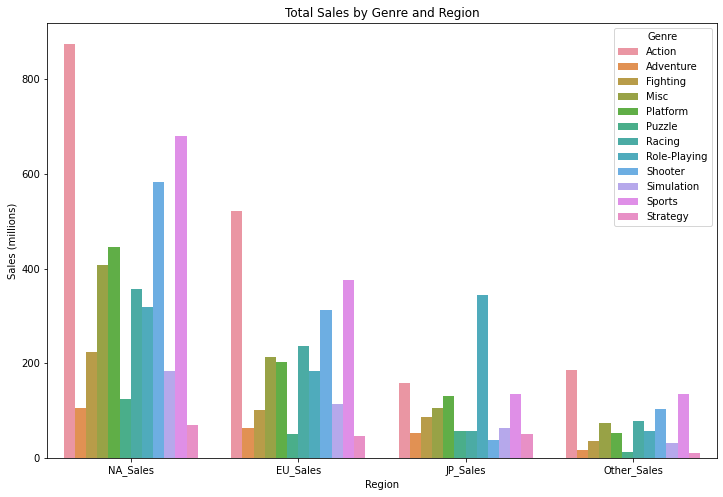

In [41]:
#4개의 지역으로 나뉘었을때 장르별 판매량import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
# group by Genre and sum the sales in each region (장르로그룹화후 , 각 지역에 대한 합.)
sales_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()

# reshape the data into long format (melt기법을 통해서 데이터를 녹여준다)
df_melt = pd.melt(sales_by_genre, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'],
                  var_name='Region', value_name='Sales')

# create the bar chart(바차트로 시각화)
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melt, x='Region', y='Sales', hue='Genre')
plt.title('Total Sales by Genre and Region')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.show()


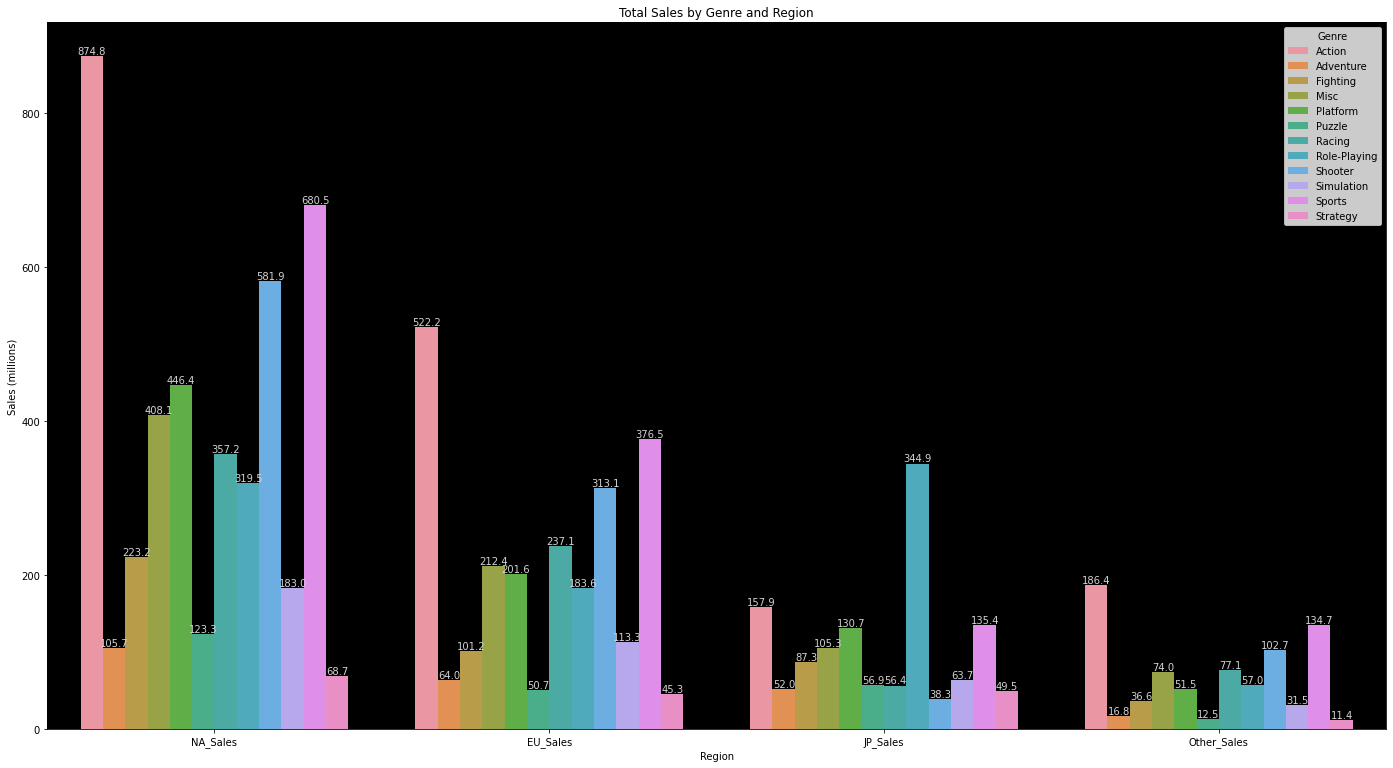

In [42]:
#4개의 지역으로 나뉘었을때 장르별 판매량
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# group by Genre and sum the sales in each region
sales_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()

# reshape the data into long format
df_melt = pd.melt(sales_by_genre, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'],
                  var_name='Region', value_name='Sales')

# create the bar chart
plt.figure(figsize=(24, 13))
ax = sns.barplot(data=df_melt, x='Region', y='Sales', hue='Genre')
plt.title('Total Sales by Genre and Region')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')

# add labels for bar heights # 수치 라벨을 소숫점 한자리까지 붙여주었다. 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.034, p.get_height()), ha='center', va='bottom', color='lightgrey')
# set background color 배경색을 어둡게 바꾸어 주었다. 
ax.set_facecolor('black')
plt.show()



In [43]:
#좀더 지역의 큰의미에서의
#서양(Western), 아시아(asian) 두 그룹으로 나누어보자
df['Western_Sales']= df.NA_Sales + df.EU_Sales
df['Asian_Sales'] = df.JP_Sales + df.Other_Sales

In [44]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.17,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.19,0.01
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01,0.00
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.63,0.16
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.10,0.28


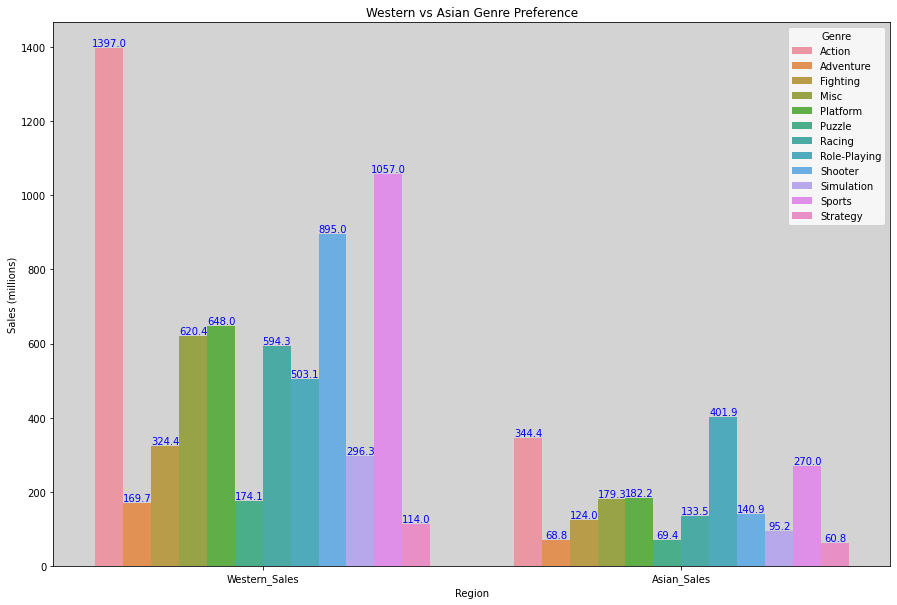

In [45]:
#Western,Asian 두 지역으로만 나뉘었을때
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# group by Genre and sum the sales in each region
sales_by_genre_2region = df.groupby('Genre')[['Western_Sales','Asian_Sales']].sum().reset_index()

# reshape the data into long format
df_melt = pd.melt(sales_by_genre_2region, id_vars='Genre', value_vars=['Western_Sales', 'Asian_Sales'],
                  var_name='Region', value_name='Sales')

# create the bar chart
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=df_melt, x='Region', y='Sales', hue='Genre')
plt.title('Western vs Asian Genre Preference')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')

# add labels for bar heights
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.034, p.get_height()), ha='center', va='bottom', color='blue')
# set background color
ax.set_facecolor('lightgrey')
plt.show()


#서양은 역시 북미/유럽 이다보니 그대로 액션/스포츠/슈팅 장르순으로 
#일본만 보았을때는 롤플레잉이 압도적이었지만
#일본을 제외한 다른 나라들 역시 북미/유럽의 경향을 따라가다보니 둘이 합쳐 동양으로 분류했을 때는 1순위인 롤플레잉과 2순위인 액션의 격차가 많이 좁혀졌다. 하지만 여전히 1순위는 롤플레잉이었다. 물론 이것은 대부분 일본의 지분이 컸는데, 그만큼 일본에서 롤플레잉이 압도적인 인기가 있다는 것을 알 수 있다.

In [46]:
sales_by_genre_2region

,Genre,Western_Sales,Asian_Sales
0,Action,1396.97,344.35
1,Adventure,169.71,68.76
2,Fighting,324.42,123.98
3,Misc,620.41,179.31
4,Platform,648.05,182.18
5,Puzzle,174.08,69.39
6,Racing,594.29,133.50
7,Role-Playing,503.12,401.91
8,Shooter,894.97,140.93
9,Simulation,296.31,95.18


# 각 4지역과 전체지역에 따른 BEST3 데이터프레임과 WORST3 데이터프레임을 만들어보았다.

In [47]:
import numpy as np

In [48]:
#Best3 인 데이터 프레임 만들기
ingredient_for_best3_worst3 =['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']

result_values_best3 = []

for i in ingredient_for_best3_worst3:
    best3 = df.groupby('Genre').sum().sort_values(by=[f'{i}'], ascending=False).head(3)
    result_best3 = best3.index.values
    result_values_best3.append(result_best3)

genre_dict_best3 = {}
for i, col in enumerate(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']):
    genre_dict_best3[col] = result_values_best3[i]

df_result_best3 = pd.DataFrame(genre_dict_best3)
#BEST_3 이라는 column을 생성후 첫번째 열에 넣어주자
df_result_best3.insert(0, 'Best_3', result_values_best3[0])
#BEST_3 의 값들을 교체해주자
df_result_best3.Best_3= np.array([6,5,4])
df_result_best3

,Best_3,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,6,Action,Action,Role-Playing,Action,Action
1,5,Sports,Sports,Action,Sports,Sports
2,4,Shooter,Shooter,Sports,Shooter,Shooter


In [49]:
#Worst 3인 데이터프레임 만들기 , ascending=False값만 True 로 바꾸어주면됨
ingredient_for_best3_worst3 =['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']

result_values_worst3 = []

for i in ingredient_for_best3_worst3:
    worst3 = df.groupby('Genre').sum().sort_values(by=[f'{i}'], ascending=True).head(3)
    result_worst3 = worst3.index.values
    result_values_worst3.append(result_worst3)

genre_dict_worst3 = {}
for i, col in enumerate(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']):
    genre_dict_worst3[col] = result_values_worst3[i]

df_result_worst3 = pd.DataFrame(genre_dict_worst3)

df_result_worst3

#Worst_3 이라는 column을 생성후 첫번째 열에 넣어주자
df_result_worst3.insert(0, 'Worst_3', result_values_worst3[0])
#BEST_3 의 값들을 교체해주자
df_result_worst3.Worst_3= np.array([1,2,3])
df_result_worst3


,Worst_3,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Strategy,Strategy,Shooter,Strategy,Strategy
1,2,Adventure,Puzzle,Strategy,Puzzle,Adventure
2,3,Puzzle,Adventure,Adventure,Adventure,Puzzle


각 지역별 BEST3,와 WORST3 (Best_3 column과 Worst_3 column의 value들은 각각 점수라고 볼 수 도 있슴, 즉 점수가 높을 수록 등수가 높다.-> 북미에서는 점수가 1점으로 제일 낮은 Strategy장르 선호도가 최하이다.)

In [50]:
df_result_best3_worst3 = pd.concat([df_result_best3, df_result_worst3], axis = 1)
df_result_best3_worst3

,Best_3,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Worst_3,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,6,Action,Action,Role-Playing,Action,Action,1,Strategy,Strategy,Shooter,Strategy,Strategy
1,5,Sports,Sports,Action,Sports,Sports,2,Adventure,Puzzle,Strategy,Puzzle,Adventure
2,4,Shooter,Shooter,Sports,Shooter,Shooter,3,Puzzle,Adventure,Adventure,Adventure,Puzzle


In [51]:
merged_df_result_best3_worst3 = pd.merge(df_result_best3, df_result_worst3, on=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'])
merged_df_result_best3_worst3

,Best_3,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Worst_3


In [52]:
concatenated_df = pd.concat([df_result_best3, df_result_worst3], axis=0, join='outer')
concatenated_df

,Best_3,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Worst_3
0,6.0,Action,Action,Role-Playing,Action,Action,NaN
1,5.0,Sports,Sports,Action,Sports,Sports,NaN
2,4.0,Shooter,Shooter,Sports,Shooter,Shooter,NaN
0,NaN,Strategy,Strategy,Shooter,Strategy,Strategy,1.0
1,NaN,Adventure,Puzzle,Strategy,Puzzle,Adventure,2.0
2,NaN,Puzzle,Adventure,Adventure,Adventure,Puzzle,3.0


In [53]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.17,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.19,0.01
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01,0.00
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.63,0.16
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.10,0.28


#연도별 Year의 측면에서 데이터프레임을 볼려고 한다. 
#위에서 장르를 집계할때는 ,Year자체의 값이 불분명하게 입력 된 것도 지역별 자체의 장르를 구분할때는 별로 큰 의미가 상관이 없다고 생각하여(제거전 전체데이터 약 1만6천에 비해 371개) Year의 outlier들도 포함 시켰지만 이번 관점은 조금 더 구체적으로 Year위주로 볼려고 하기 때문에 이상치들을 삭제해준다.(대략 0.2%비율)

In [54]:
#Year Histogram으로 
#년도값의 이상치가 있나 확인해보자
#outlier들 확인

In [55]:
df.Year.describe()

count    16548.000000
mean      1961.548042
std        296.297059
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

(array([  371.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16177.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <BarContainer object of 10 artists>)

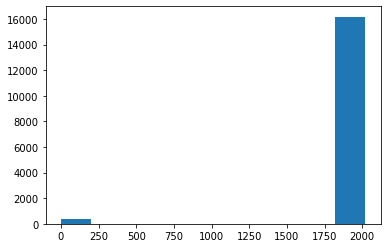

In [56]:
plt.hist(df.Year)

In [57]:
df[df.Year<1750] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
31,Rock Band,X360,0,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48,2.27,0.21
73,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16,0.13,0.03
80,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18,0.17,0.01
108,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,0,Racing,Unknown,0.00,0.00,0.02,0.00,0.02,0.00,0.02
212,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01,0.10,0.09,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
16231,Madden NFL 11,Wii,0,Sports,Unknown,0.70,0.00,0.00,0.05,0.75,0.70,0.05
16347,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00,0.02,0.02,0.00
16378,Yoostar on MTV,X360,0,Misc,Unknown,0.06,0.00,0.00,0.00,0.06,0.06,0.00
16384,Bejeweled 3,X360,0,Puzzle,Unknown,0.13,0.00,0.00,0.01,0.14,0.13,0.01


(array([ 107.,   64.,   89.,  438., 1256., 2413., 3881., 5205., 2381.,
         343.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <BarContainer object of 10 artists>)

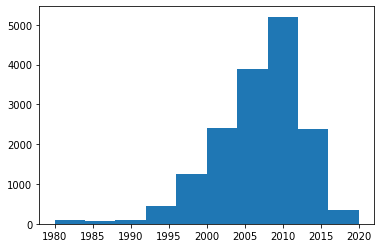

In [58]:
plt.hist(df.Year[df.Year > 1750])

(array([324.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  13.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <BarContainer object of 10 artists>)

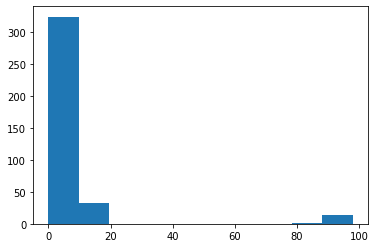

In [59]:
plt.hist(df.Year[df.Year < 1980])

In [60]:
#1980년도 이하의 데이터 행들은 모두 삭제한다. (그래프에서 추정되던 1750미만 데이터 갯수와 1980 미만 )
if len(df.Year[df.Year < 1980]) == len(df.Year[df.Year < 1750]) :
  print("Let's delete data rows whose year is before 1980.")

Let's delete data rows whose year is before 1980.


In [61]:
df[df.Year<1980]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
31,Rock Band,X360,0,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48,2.27,0.21
73,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16,0.13,0.03
80,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18,0.17,0.01
108,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,0,Racing,Unknown,0.00,0.00,0.02,0.00,0.02,0.00,0.02
212,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01,0.10,0.09,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
16231,Madden NFL 11,Wii,0,Sports,Unknown,0.70,0.00,0.00,0.05,0.75,0.70,0.05
16347,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00,0.02,0.02,0.00
16378,Yoostar on MTV,X360,0,Misc,Unknown,0.06,0.00,0.00,0.00,0.06,0.06,0.00
16384,Bejeweled 3,X360,0,Puzzle,Unknown,0.13,0.00,0.00,0.01,0.14,0.13,0.01


In [62]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.17,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.19,0.01
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01,0.00
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.63,0.16
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.10,0.28


In [63]:
deleted_year_index= df[df.Year<1980].index
df.drop(index=deleted_year_index,axis=0,inplace=True)

In [64]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.17,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.19,0.01
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01,0.00
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.63,0.16
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.10,0.28


In [65]:
#80,90,00,10년대 로 구분했으므로 2020을 포함시키지 않기로했다 
#2017년 이후 자료도 2020 년 딱 한 인덱스 밖에없고, 판매량도 매우 저조하고 0인값들도 여러개있으므로 삭제해주기로 했다.
df[df['Year']>2017]
rows_to_drop_2020 = df[df['Year'] == 2020].index
rows_to_drop_2020
df.drop(rows_to_drop_2020, axis=0,inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.17,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.19,0.01
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01,0.00
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.63,0.16
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.10,0.28


In [66]:
#여기까지는 df가 보존된다.

In [67]:
df.Year.min()

1980

In [68]:
#1980 ~ 2017까지의 장르별, 총 출고량 데이터 모음
df_year= df[['Year','Genre','Total_Sales']]
df_year
df_year_sorted = df_year.sort_values(by='Year')
df_year_sorted.reset_index(inplace=True,drop=True)
df_year_sorted

,Year,Genre,Total_Sales
0,1980,Fighting,0.77
1,1980,Shooter,4.31
2,1980,Action,0.34
3,1980,Misc,0.27
4,1980,Shooter,2.76
...,...,...,...
16171,2016,Action,0.11
16172,2016,Fighting,0.82
16173,2017,Action,0.01
16174,2017,Role-Playing,0.01


# 트렌드는 어떤 것을 기준으로 ?
* 연도 별 ,전체 출고량을 장르별로 시각화 해보았다.
* 이런 경우 한 그래프에 시각화 하는 것은 매우 복잡하고 분석도 어렵기때문에
* 개별적인 장르의 트렌드를 보기위해서 각 그래프를 장르별(12장르) 12개로 분리시켜서 연도에 따른 총 출고량을 보기로 시도 하였다.
* 그리고 10년 단위로 나누어서, 각 시대별 각 장르가 차지하는 비율을 파이차트로 그려 분석하기로 했다.

# 연도별로 트렌드가 존재할까?
* 시대별로 특징을 구분하자면 
* 80년대는 플랫폼의 전성시대
* 90년 대는 롤플레잉의 흥행기와 레이싱의 반짝등장 
* 2000년대는 액션,스포츠,슈터 3대장의 영역확장
* 2010년대는 이들의 자리매김 그리고 플랫폼의 완전 하락

# 왜 존재한다/존재하지 않는다고 생각하나?
* 게임의 역사가 얼마 되지 않은 초창기에는 기술의 발전도 부족했고 
* 게임에 대한 유저들의 이해와 숙련도도 상당히 낮은 편이기 때문에
* 비교적 컨트롤과 플레잉이 쉽고 단순한 플랫폼 베이스드 게임이 유행했다고 생각한다.
* 이와 더불어 시간이 지남에 따라 컴퓨터 3D그래픽 기술 눈부신 발전과 함께
* 빠른 반응속도와 프레임들 구현이 가능하고,
* 거대해진 게임 시장과 더불어 유저들의 숙련도도 발전하고 점점 더 자극적이고 즉각적인 그리고 
* 좀더 다이나믹한 게임을 추구하게 되면서 현재의 행보가 마련되었다고 생각한다.

#연도 별 ,전체 출고량을 장르별로 시각화 해보았다.
#이런 경우 한 그래프에 시각화 하는 것은 매우 복잡하고 분석도 어렵기때문에
#개별적인 장르의 트렌드를 보기위해서 각 그래프를 장르별(12장르) 12개로 분리시켜서 연도에 따른 총 출고량을 보기로 시도 하였다.
#그리고 10년 단위로 나누어서, 각 시대별 각 장르가 차지하는 비율을 파이차트로 그려 분석하기로 했다.

In [69]:
#매우 복잡한 한 그래프 표현 시각화

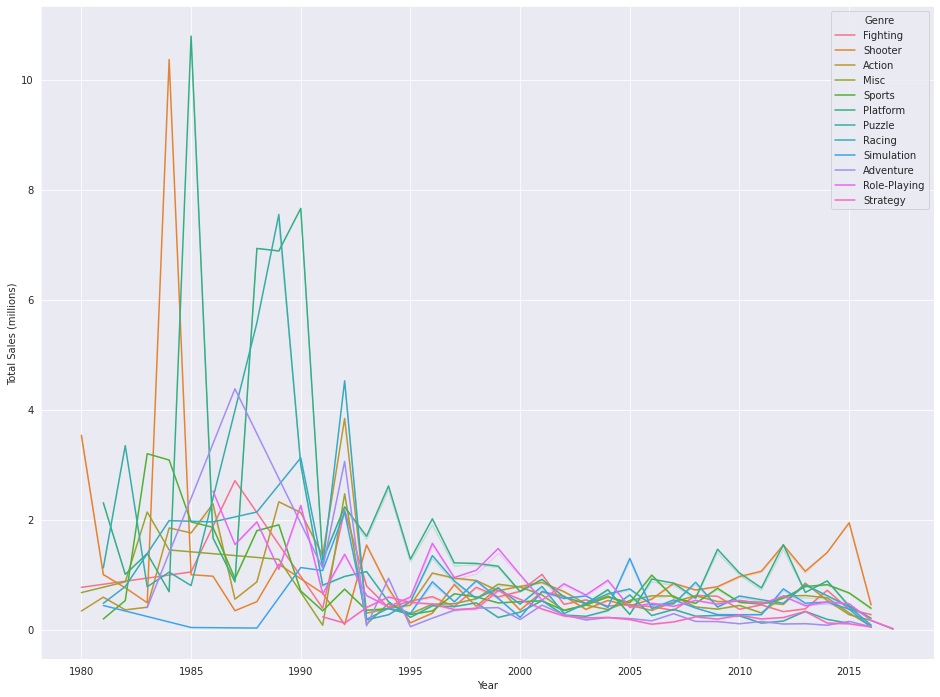

In [70]:
#import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(16, 12))

sns.lineplot(data=df_year_sorted, x='Year',y='Total_Sales',hue='Genre' ,ci=False)
plt.ylabel('Total Sales (millions)')
plt.show()


장르별 12개로 나눈 연도별 전체출고량 그래프

In [71]:
# In this modified code, FacetGrid creates a grid of subplots, 
# with each subplot representing a unique Genre. 
# The col parameter is set to "Genre" to indicate that the columns of the grid should be determined by the unique values in the "Genre" column 
# of the df_year_sorted DataFrame. The col_wrap parameter is set to 3 to indicate that there should be a maximum of 3 columns in the grid 
# before wrapping to a new row. The height parameter sets the height of each subplot, and the aspect parameter sets the aspect ratio.

# The map function is used to apply a lineplot to each subplot. 
# The first two arguments to map are the x and y variables to be plotted, 
# and the ci parameter is set to False to remove the confidence interval shading from the plot.

# This should generate a grid of subplots, with each subplot showing a line plot of Total Sales vs Year for a specific Genre.

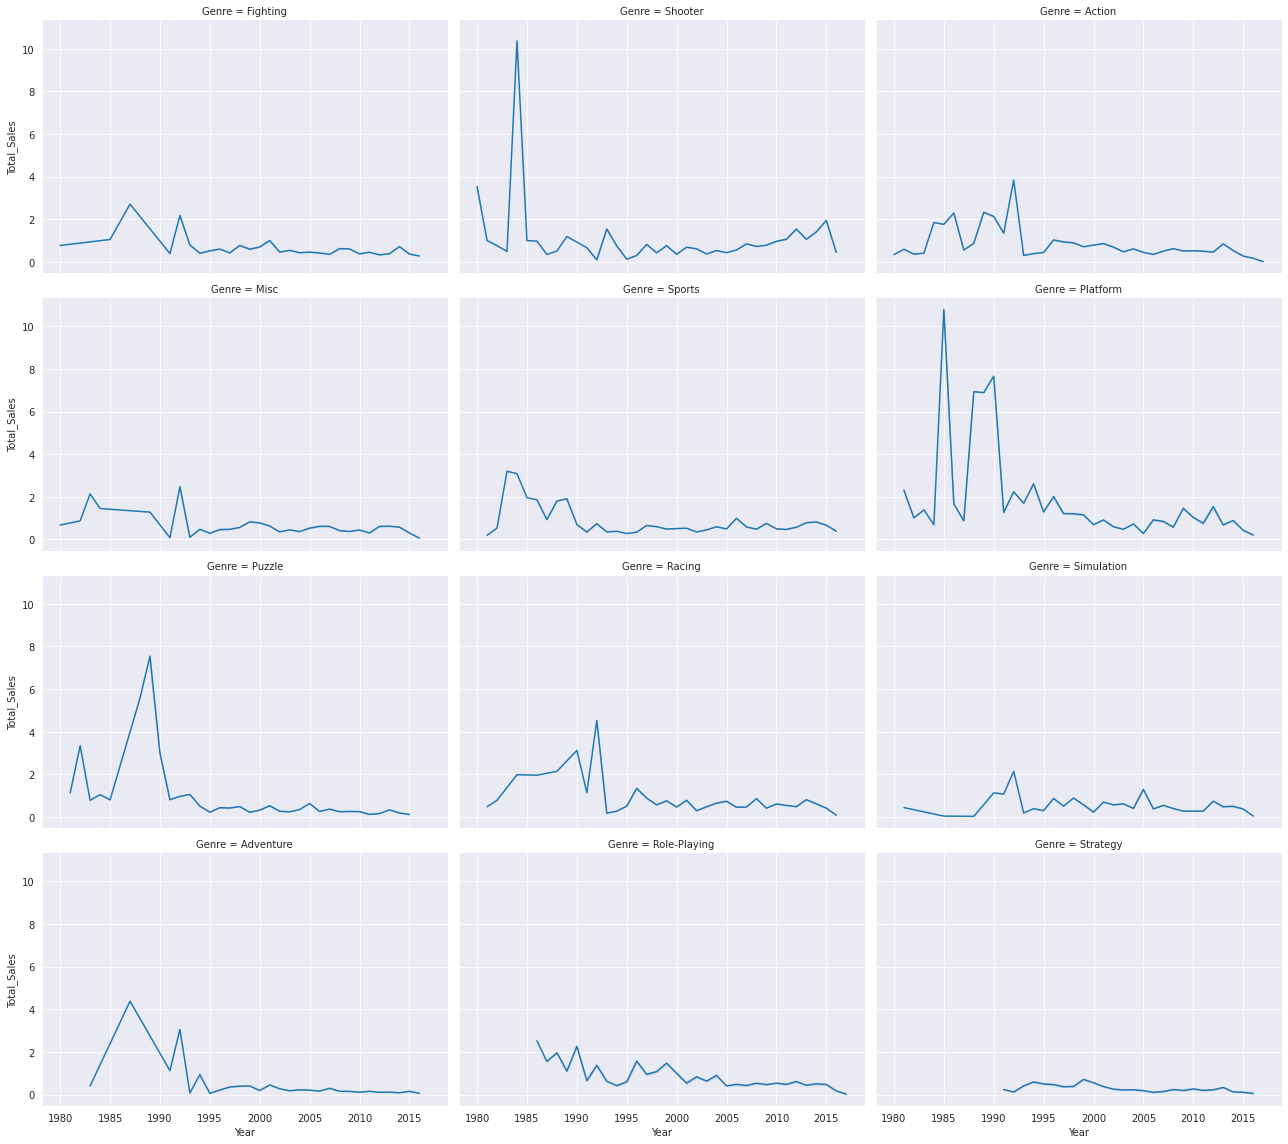

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

g = sns.FacetGrid(df_year_sorted, col="Genre", col_wrap=3, height=4, aspect=1.5)

g.map(sns.lineplot, "Year", "Total_Sales", ci=False)
plt.ylabel('Total Sales (millions)')
plt.show()


#대부분 2015-2020 년 구간을보면 전체 장르에 대해서 출고량이 감소하는 추세를 보이며 ,
#특정시대에 극대값이 40년 평균치에 비해 매우 높은 장르들이 있다. (플랫폼,슈터,퍼즐 정도로 볼 수 있다.)
#한 장르가 2020-2030년 쯤에는 얼마나 증가 할것인지 감소할 것인지 예측하기는 힘들어 보인다.


In [73]:
#여기까지도 df 가 유지된다.

In [74]:
#df 를 카피해주자
new_df=df.copy()
new_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.17,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.19,0.01
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01,0.00
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.63,0.16
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.10,0.28


In [75]:
import pandas as pd

# Assume your dataframe is named 'df'

# First, select the columns you're interested in
df_year = df[['Year', 'Genre', 'Total_Sales']]

# Group by year and genre, and sum the total sales for each group
df_grouped = df_year.groupby(['Year', 'Genre']).sum()

# Calculate the total sales for each year
df_year_total = df_year.groupby('Year').sum()

# Calculate the ratio of sales for each genre in each year
df_ratio = df_grouped.div(df_year_total, level='Year') * 100

# The resulting dataframe has the ratio of sales for each genre in each year
df_ratio

Total_Sales
Year Genre                    
1980 Action           3.125000
     Fighting         7.077206
     Misc            24.816176
     Shooter         64.981618
1981 Action          41.451794
...                        ...
2016 Simulation       0.587526
     Sports          21.783670
     Strategy         0.783368
2017 Action          20.000000
     Role-Playing    80.000000

[387 rows x 1 columns]

# 시대별 어떤 장르가 어느 정도로 출고 되었나 하는 비율을 보기위해
# 시대를 10년 단위로 (decade) 구분하고 그에 따른 장르별 비율을 파이차트로 시각화 시키기로 한다.

In [76]:
df_year = df[['Year', 'Genre', 'Total_Sales']]
df_year_sorted = df_year.sort_values(by='Year')
df_year_sorted.reset_index(inplace=True, drop=True)

year_list = [1980, 1990, 2000, 2010, 2020]
df_year_4grouped = {}

for i in range(len(year_list) - 1):
    start_year = year_list[i]
    end_year = year_list[i + 1]
    df_year_4grouped[start_year] = df_year_sorted[(df_year_sorted['Year'] >= start_year) & 
                                                  (df_year_sorted['Year'] < end_year)]


In [77]:
df_year_4grouped

{1980:      Year     Genre  Total_Sales
 0    1980  Fighting         0.77
 1    1980   Shooter         4.31
 2    1980    Action         0.34
 3    1980      Misc         0.27
 4    1980   Shooter         2.76
 ..    ...       ...          ...
 198  1989    Puzzle         0.06
 199  1989    Sports         1.61
 200  1989    Puzzle         5.34
 201  1989      Misc         1.28
 202  1989    Sports         1.99
 
 [203 rows x 3 columns], 1990:       Year         Genre  Total_Sales
 203   1990  Role-Playing         1.40
 204   1990        Action         2.60
 205   1990        Action         2.23
 206   1990        Sports         0.30
 207   1990        Sports         0.33
 ...    ...           ...          ...
 1949  1999       Shooter         1.64
 1950  1999      Strategy         0.11
 1951  1999        Sports         0.93
 1952  1999        Puzzle         0.03
 1953  1999    Simulation         0.33
 
 [1751 rows x 3 columns], 2000:        Year         Genre  Total_Sales
 1954   2000 

In [78]:
df_80s = df_year_4grouped[1980]
df_90s = df_year_4grouped[1990]
df_00s = df_year_4grouped[2000]
df_10s = df_year_4grouped[2010]

In [79]:
#이것을 실행하면 df 의 구조가 변형된다.
#년도별 ratio 프레임 만들기
#genre_sales_ratio_each
#반복문을통하여, 딕셔너리에 년도별 구분 한 4개의 장르별 판매 비율을 넣어주고 그뒤에
#반복문을 통해서 파이차트를 사용해보자
dfs = {'80s': df_80s, '90s': df_90s, '00s': df_00s, '10s': df_10s}
genre_sales_ratio = {}

for decade, df in dfs.items():
    genre_sales = df.groupby('Genre')['Total_Sales'].sum()
    genre_sales_ratio[decade] = genre_sales / genre_sales.sum()

genre_sales_ratio

{'80s': Genre
 Action          0.136292
 Adventure       0.012749
 Fighting        0.019310
 Misc            0.022511
 Platform        0.323287
 Puzzle          0.167365
 Racing          0.032273
 Role-Playing    0.040674
 Shooter         0.159416
 Simulation      0.001360
 Sports          0.084762
 Name: Total_Sales, dtype: float64, '90s': Genre
 Action          0.108914
 Adventure       0.034628
 Fighting        0.097010
 Misc            0.049942
 Platform        0.163746
 Puzzle          0.030659
 Racing          0.116386
 Role-Playing    0.143904
 Shooter         0.053753
 Simulation      0.040974
 Sports          0.115300
 Strategy        0.044785
 Name: Total_Sales, dtype: float64, '00s': Genre
 Action          0.184416
 Adventure       0.026874
 Fighting        0.050124
 Misc            0.105458
 Platform        0.080880
 Puzzle          0.025488
 Racing          0.094716
 Role-Playing    0.089524
 Shooter         0.093816
 Simulation      0.057573
 Sports          0.173869
 Str

In [80]:
#df의 구조가 변형된모습
df.shape

(5097, 3)

In [81]:
#copy가 남아있다.
new_df.shape

(16176, 12)

In [82]:
df_80s.groupby('Genre')['Total_Sales'].sum()

Genre
Action           51.10
Adventure         4.78
Fighting          7.24
Misc              8.44
Platform        121.21
Puzzle           62.75
Racing           12.10
Role-Playing     15.25
Shooter          59.77
Simulation        0.51
Sports           31.78
Name: Total_Sales, dtype: float64

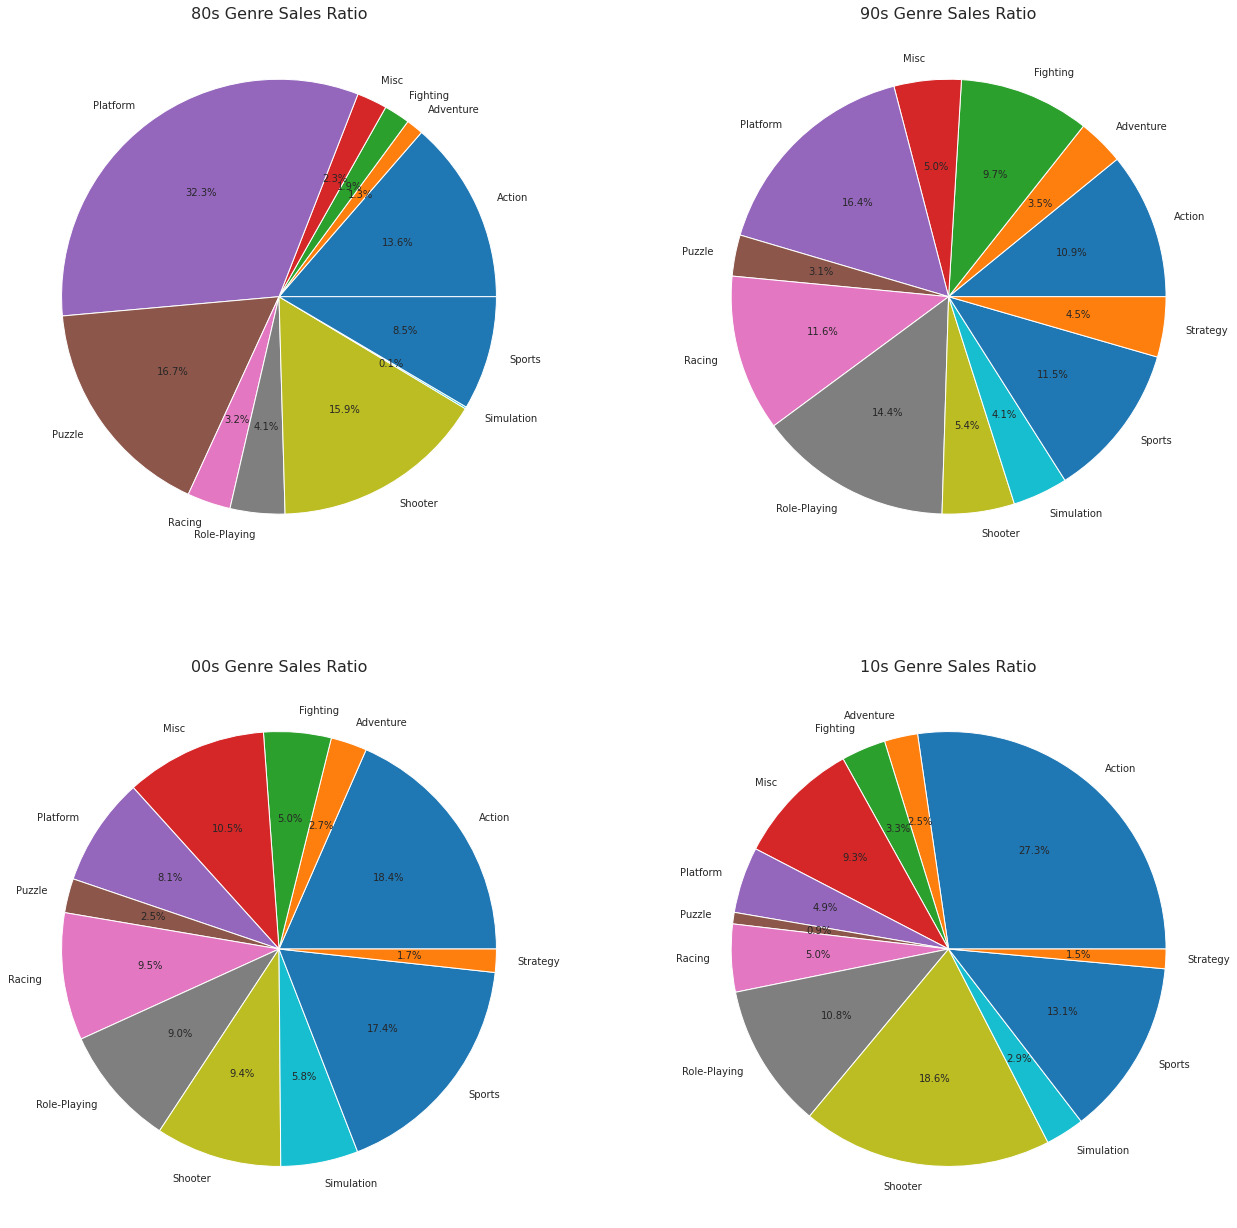

In [83]:
#pie chart 최종 수정본 4개의 파이차트 년도별
import matplotlib.pyplot as plt

dfs = {'80s': df_80s, '90s': df_90s, '00s': df_00s, '10s': df_10s}
genre_sales_ratio = {}

fig, axs = plt.subplots(2, 2, figsize=(22, 22))

for i, (decade, df) in enumerate(dfs.items()):
    genre_sales = df.groupby('Genre')['Total_Sales'].sum()
    genre_sales_ratio[decade] = genre_sales / genre_sales.sum()

    # plot pie chart
    labels = genre_sales_ratio[decade].index
    values = genre_sales_ratio[decade].values
    axs[i // 2, i % 2].pie(values, labels=labels, autopct='%1.1f%%')
    axs[i // 2, i % 2].set_title(decade + " Genre Sales Ratio",fontsize="16")

plt.show()


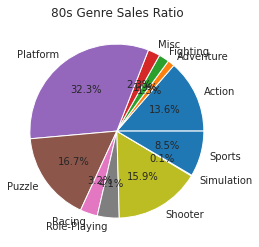

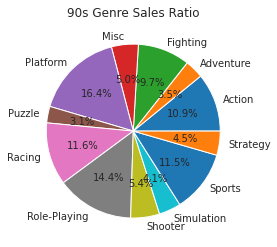

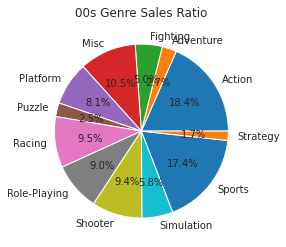

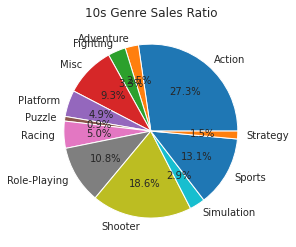

In [84]:
# 반복문을 통해서 4개의 년도별 파이차트를 사용해보자
import matplotlib.pyplot as plt

dfs = {'80s': df_80s, '90s': df_90s, '00s': df_00s, '10s': df_10s}
genre_sales_ratio = {}

for decade, df in dfs.items():
    genre_sales = df.groupby('Genre')['Total_Sales'].sum()
    genre_sales_ratio[decade] = genre_sales / genre_sales.sum()

    # plot pie chart
    labels = genre_sales_ratio[decade].index
    values = genre_sales_ratio[decade].values
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(decade + " Genre Sales Ratio")
    plt.show()


In [85]:
#80년대 프레임에서 장르별 판매 비율구하기 
genre_sales = df_80s.groupby('Genre')['Total_Sales'].sum()
genre_sales_ratio_80s = genre_sales / genre_sales.sum()
genre_sales_ratio_80s

Genre
Action          0.136292
Adventure       0.012749
Fighting        0.019310
Misc            0.022511
Platform        0.323287
Puzzle          0.167365
Racing          0.032273
Role-Playing    0.040674
Shooter         0.159416
Simulation      0.001360
Sports          0.084762
Name: Total_Sales, dtype: float64

# 시간에 흐름에 따라 각 시점관찰 데이터와 10년전 장르별 비율을 비교해보도록 한다.

#80년대 인기장르
# 1.Platform(32.3), 2.Puzzle(16.7), 3.Shooter(15.9) 4.Action(13.6)
* 그 밖에 주목 할점 Racing 3.2 , Role-playing 4.1

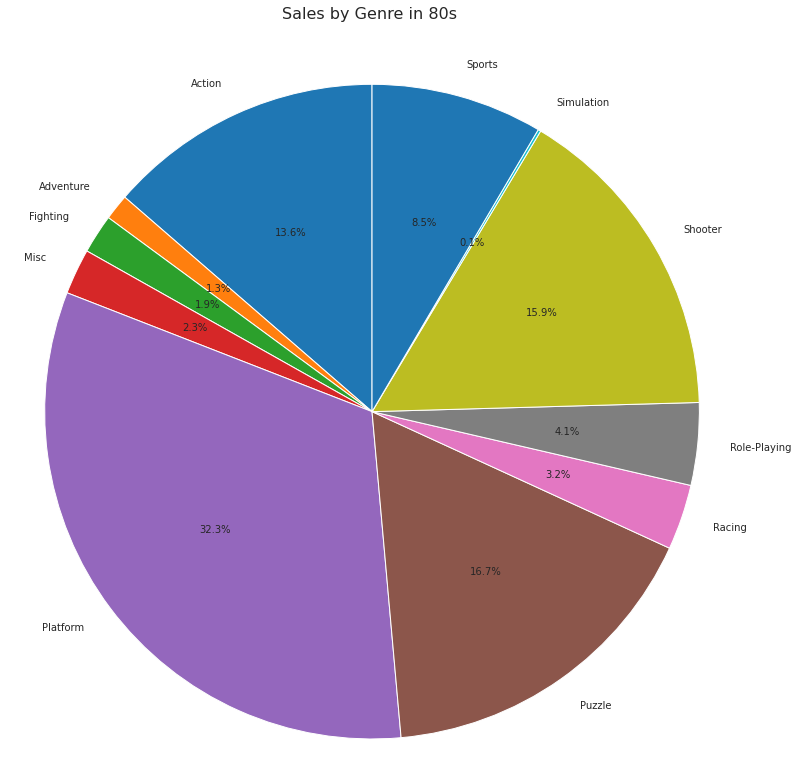

In [86]:
#80년대 프레임에서 장르별 판매 비율 파이차트로 시각화
import matplotlib.pyplot as plt

labels = genre_sales_ratio_80s.index
sizes = genre_sales_ratio_80s.values

fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Sales by Genre in 80s', fontsize=16,y=1.05)
plt.show()

#90년대 인기장르
# 1.Platform(16.4), 2.Role-Playing(14.4), 3.Racing(11.6), 4.Sports(11.5) 
* 80년대와 비교하면 플랫폼의 비중이 거의 절반 가량 줄어들고 
*롤플레잉이 거의 3배이상 늘었다. 퍼즐장르도 80년대 대비 90년대 차지하는 비율의 수치가 1/5로 매우 급격하게 줄어들었다. 
*격투게임도 많이 증가한 모습을 보인다.

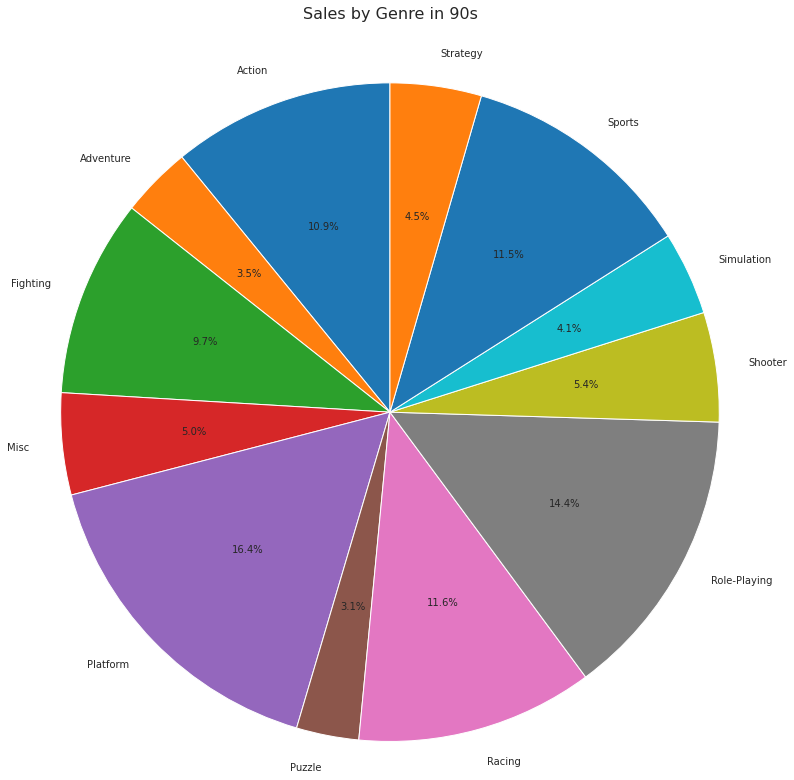

In [87]:
#90년대 프레임에서 장르별 판매 비율 파이차트로 시각화
import matplotlib.pyplot as plt
genre_sales_ratio_90s= genre_sales_ratio['90s']
labels = genre_sales_ratio_90s.index
sizes = genre_sales_ratio_90s.values

fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Sales by Genre in 90s', fontsize=16,y=1.05)
plt.show()

#2000년대 인기장르
# 1.Action(18.4), 2.Sports(17.4), 3.Misc(10.5) 4.Racing(9.5) 5.Shooter(9.4)
* 플랫폼은 90년대 대비 또 수치가 8.1로 거의 절반가량 비율이 줄어들음 매우 꾸준하게 급격한 하락세를 보이고 있슴 .
* 90년대에 급격하게 증가했던 롤플레잉도 약간 감소하고 있고, 점점 전체 판매량 트렌드인 액션,스포츠,슈터의 비율이 증가하면서 3개의 영역이 상위권으로 자리잡는 모습이 보인다.
* Misc, 그외의 특정 분류로 분류하긴 힘든 이 부류가 2000년대에는 2배이상 증가한 부분이 특징이다.

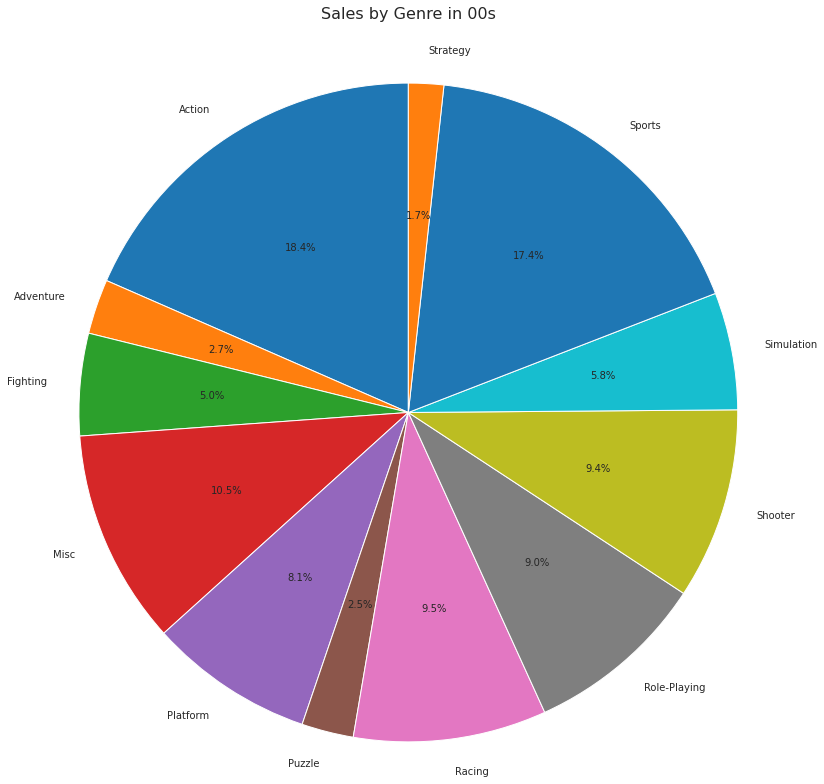

In [88]:
#00년대 프레임에서 장르별 판매 비율 파이차트로 시각화
import matplotlib.pyplot as plt
genre_sales_ratio_00s= genre_sales_ratio['00s']
labels = genre_sales_ratio_00s.index
sizes = genre_sales_ratio_00s.values

fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Sales by Genre in 00s', fontsize=16,y=1.05)
plt.show()

#2010년대 인기장르
# 1.Action(27.3), 2.Shooter(18.6), 3.Sports(13.6) 
* 2010년대는 40년 전체 가장 많은 출고량을 보였던 장르인 액션,슈터,스포츠 이 세개의 영역이 1,2,3위를 하면서 확실한 자리를 잡았고, 플랫폼 비율은 더더욱 감소하여 마이너한 비율을 차지하게 되었다.



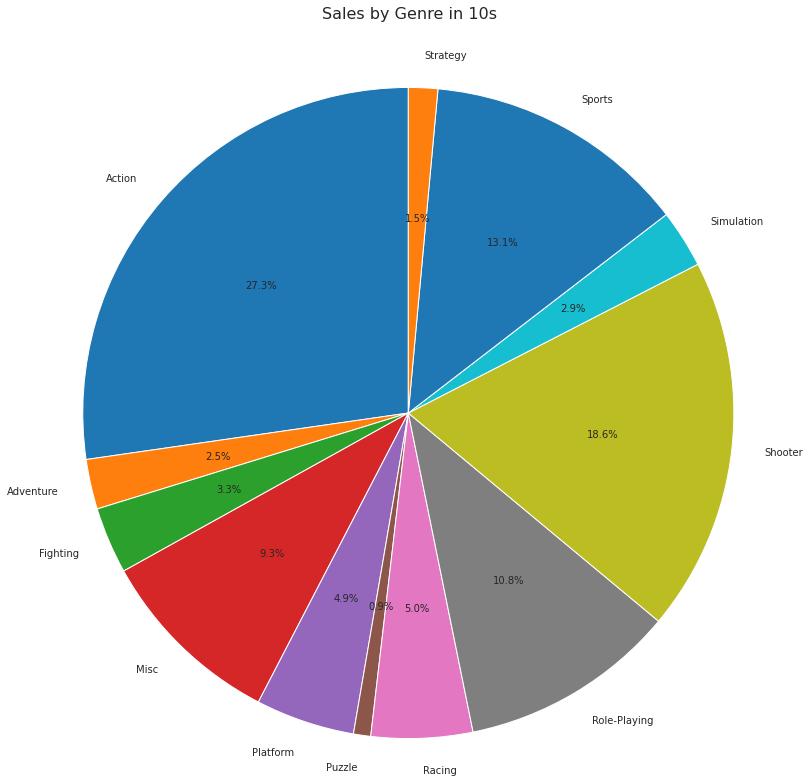

In [89]:
#10년대 프레임에서 장르별 판매 비율 파이차트로 시각화
import matplotlib.pyplot as plt
genre_sales_ratio_10s= genre_sales_ratio['10s']
labels = genre_sales_ratio_10s.index
sizes = genre_sales_ratio_10s.values

fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Sales by Genre in 10s', fontsize=16,y=1.05)
plt.show()

* 인기가 많다는 것을 어떻게 정의할까? -> 총출고량 기준으로 출고량이 높을 수록 인기가 많다라고 정의했다. 2006년에 발매된 Nintendo사의 Wii Sports 라는 게임이 역대 가장 높은 출고량(약83millions)으로 1위를 차지했다.2위는 1985년 발매된 Nintendo사의 Super Mario Bros였다.

   * 해당 게임이 왜 인기가 많다고 생각하나? -> 1위 Wii sports에 대해선 우선 타겟 유저층의 범위가 매우 크다고 할 수 있다. 숙련도의 측면에서는 초보자도 쉽게 입문 할 수 있게, 일상생활에서도 오프라인에서도 즐길 수 있고 접한 경험이 있을 법한 장르가 스포츠 장르이고, 이해도의 측면에서는 딥하고 추상적이고 매니아적인 컨셉이나 배경,설정 에 대한 요구를 이해하지 않기 때문에 어린이부터 노인까지 모두 부담없이 즐길 수 있다고 생각한다.
   2위 Super mario Bros. 에 대해서는 역시 폭넓은 유저들이 유입하기 쉽게, 초보자들도 플레이하기 쉬운 컨트롤과 게임 초창기 플랫폼 베이스의 단순함, 즉 누구나 부담없이 게임을 즐길 수 있는 장점이 유저들을 매혹 시켰다고 생각한다. 

   * 해당 분석을 통해 어떤 인사이트를 도출할 수 있을까? -> 게임 플레이를 단순화 시키고, 누구나에게 익숙하고 입문하기 쉬운 장르와 플레이 형태의 게임을 만들면 폭넓은 유저들을 끌어 들일 수 있어, 더 높은 수익을 거두기 쉬울 것 같다고 예상이 될 것 같지만, 우리는 단순 한때의 가장 높았던 총출고량만 봐서, 단순히 스포츠나 플랫폼 베이스로 장르를 선택하지 않고, 위에서 참조했던, 연도별, 시대별 흐름을 보고
   적용하여 출시할 플랫폼과 장르를 결정하기로 한다.
   * 장르는 총출고량만 보았을 때는 스포츠와 플랫폼이 압도적이나 플랫폼 장르는 90년대 이후로 거의 소멸해가는 장르이고, 스포츠 역시도 1위권은 아니기 때문에 (2010년대는 3위) 잠정적 후보로만 두도록 한다.
   * 플랫폼에서는 총출고량 상위권을 기록한 Wii와 Nintendo가 아닌 시대별 총플랫폼 비중의 대부분을 차지하는 Playstation 시리즈와 Xbox360 계열 중 하나를 출시 플랫폼으로 정하기로 한다. 
   

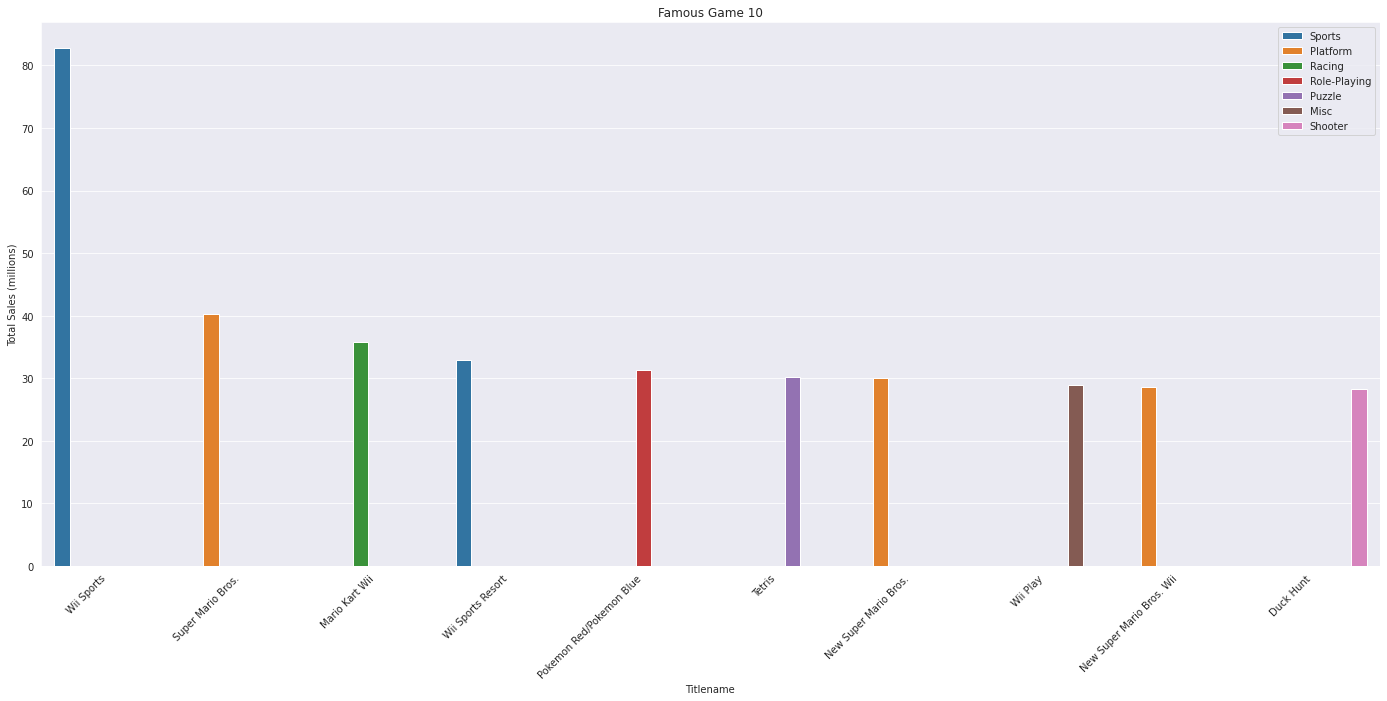

In [90]:
#각 타이틀별 장르 총출고량의 모습
famous = new_df.sort_values(by='Total_Sales',ascending=False).head(10)
famous.reset_index(drop=True,inplace=True)
plt.figure(figsize=(24, 10))
sns.barplot(x='Name', y='Total_Sales', hue='Genre', data=famous)
plt.title('Famous Game 10')
plt.xlabel('Titlename')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [91]:
famous

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,70.51,12.23
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,32.66,7.58
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,28.73,7.10
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,26.76,6.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,20.16,11.22
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,25.46,4.80
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,20.61,9.40
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,23.23,5.78
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,21.65,6.96
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,27.56,0.75


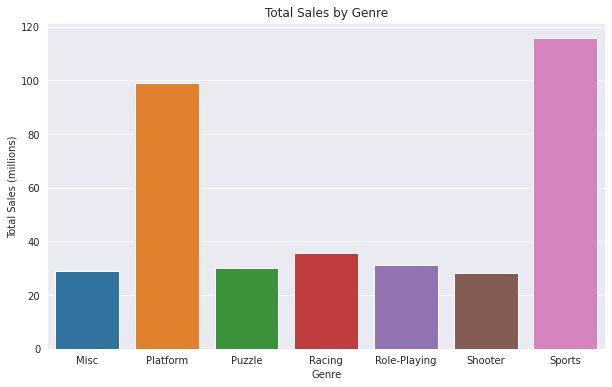

In [92]:
#가장 총출고량이 높았던 장르들
genre_sales = famous.groupby('Genre')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Total_Sales', data=genre_sales)
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.show()

1. 어떤 플랫폼으로 ? -> 트렌드를 선도하는 북미와 유럽에서 가장많이 팔리는 플랫폼 2개를 조사하고, 전체 지역에서 가장 많이 팔리는 플랫폼 2개를 조사한다.
2. PC와 기타 콘솔의 대립구도. -> PC판매량과 콘솔들의 판매량 비교 , 
3. 어떤 지역에 팔것이냐 ? -> 동 서양 모두를 타겟해서 공통적으로 가장 인기있는 장르, 롤플레잉보다는  서양동양 교집합점 
4. 장르는 정말 동서양 교집합인가 아니면 새로 증가하는 트렌드가있나
5. 예전의 트렌드가 다시 돌아올것인가?
6. 저조했던 장르가 새롭게 올라설 가능성은?

In [93]:
new_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.17,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.19,0.01
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01,0.00
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.63,0.16
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.10,0.28


In [94]:
new_df2= new_df.copy()
new_df3= new_df.copy()

In [95]:
df_platform = new_df[['Name','Platform','Year','Genre','Publisher','Western_Sales','Asian_Sales','Total_Sales']]

In [96]:
df_platform

,Name,Platform,Year,Genre,Publisher,Western_Sales,Asian_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.02,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.21,0.04,0.25
...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.19,0.01,0.20
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.01
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.63,0.16,0.79
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.10,0.28,0.38


In [97]:
#Na_SALES 북미지역 가장 많이 팔린 플랫폼 형태를 보자
df_platform_nasale = new_df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)
df_platform_nasale


Platform
X360    587.58
PS2     562.99
Wii     494.60
PS3     387.37
DS      381.13
PS      333.10
GBA     183.83
XB      178.42
N64     137.47
GC      131.45
NES     125.94
GB      113.64
PSP     104.68
PS4      93.04
PC       92.05
XOne     83.19
2600     80.32
3DS      72.76
SNES     61.23
WiiU     38.32
GEN      19.27
PSV      15.86
DC        5.43
SCD       1.00
SAT       0.72
3DO       0.00
PCFX      0.00
NG        0.00
GG        0.00
TG16      0.00
WS        0.00
Name: NA_Sales, dtype: float64

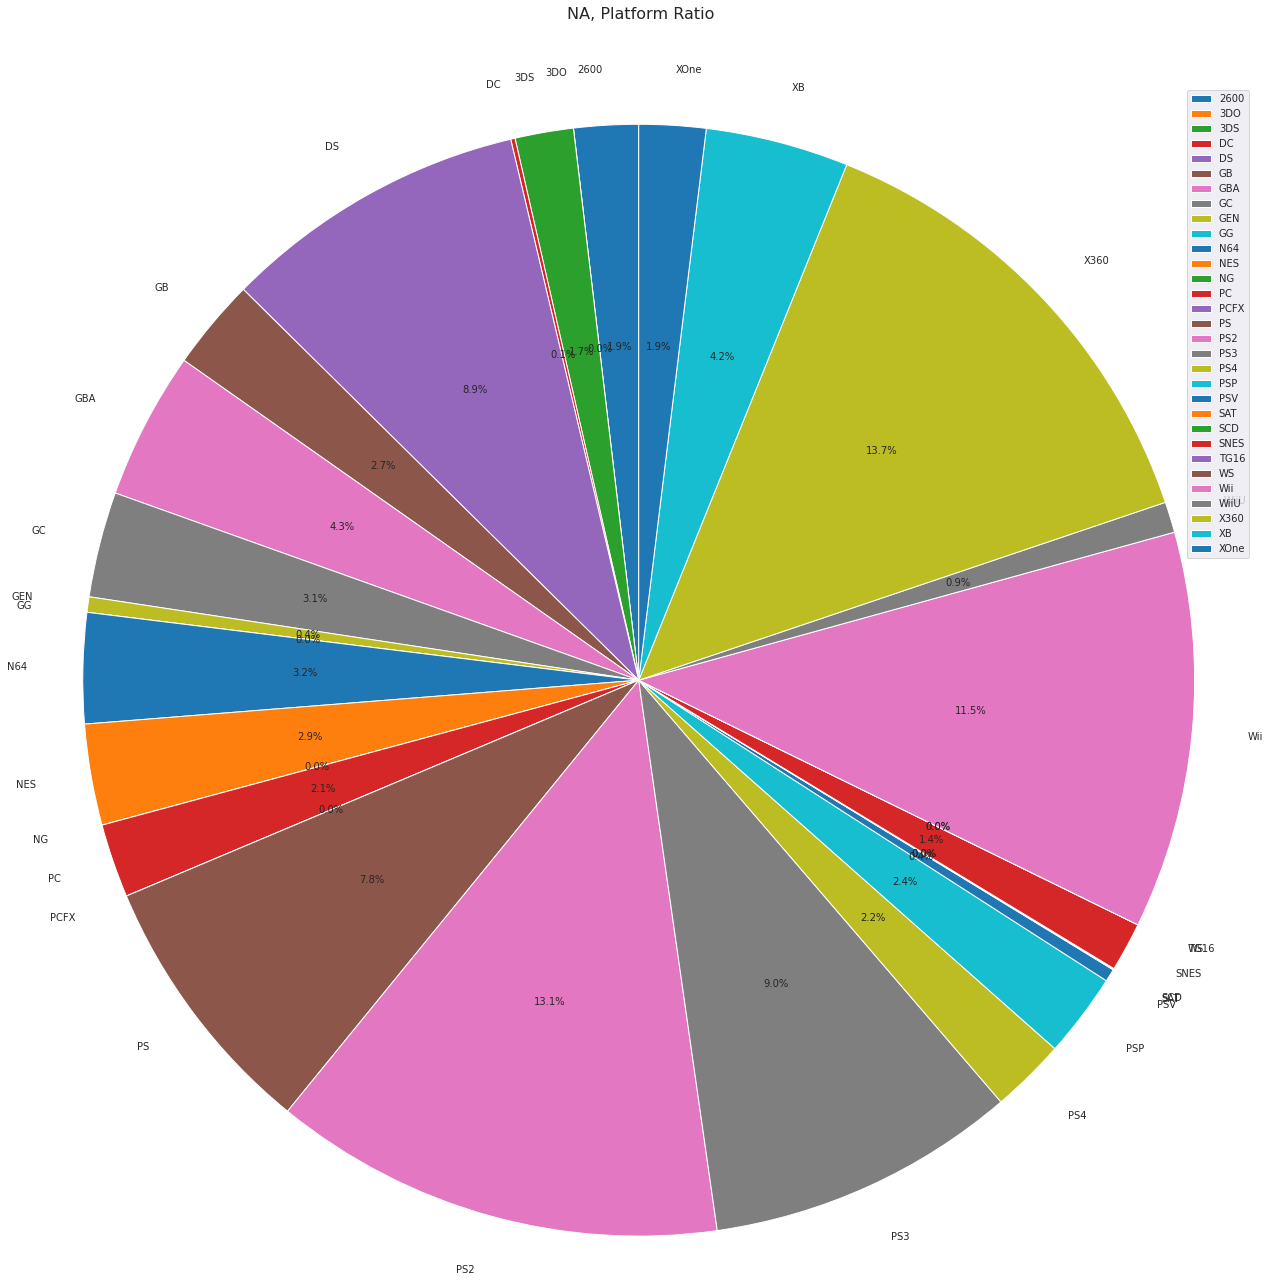

In [98]:
#지역별 플랫폼 비율을보자
#NA 북미 지역의 플랫폼별 출고비율
platform_na_sales = new_df.groupby('Platform')['NA_Sales'].sum()
platform_na_sales_ratio = platform_na_sales / platform_na_sales.sum()
platform_na_sales_ratio


import matplotlib.pyplot as plt
platform_na_sales_ratio
labels = platform_na_sales_ratio.index
sizes = platform_na_sales_ratio.values

fig, ax = plt.subplots(figsize=(22, 22))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('NA, Platform Ratio', fontsize=16,y=1.05)
plt.legend(labels, loc="best")
plt.show()

In [99]:
#EU_Sales , 유럽지역 가장 많이 팔린 플랫폼 형태를 보자
df_platform_eusale = new_df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
df_platform_eusale

Platform
PS3     339.40
PS2     328.80
X360    274.41
Wii     260.55
PS      211.29
DS      190.61
PC      136.27
PS4     120.29
GBA      74.48
PSP      66.59
XB       58.16
3DS      54.19
GB       47.51
XOne     45.63
N64      40.46
GC       38.20
WiiU     24.23
NES      21.15
SNES     19.04
PSV      16.10
GEN       5.52
2600      4.83
DC        1.69
SAT       0.54
SCD       0.36
WS        0.00
TG16      0.00
3DO       0.00
GG        0.00
NG        0.00
PCFX      0.00
Name: EU_Sales, dtype: float64

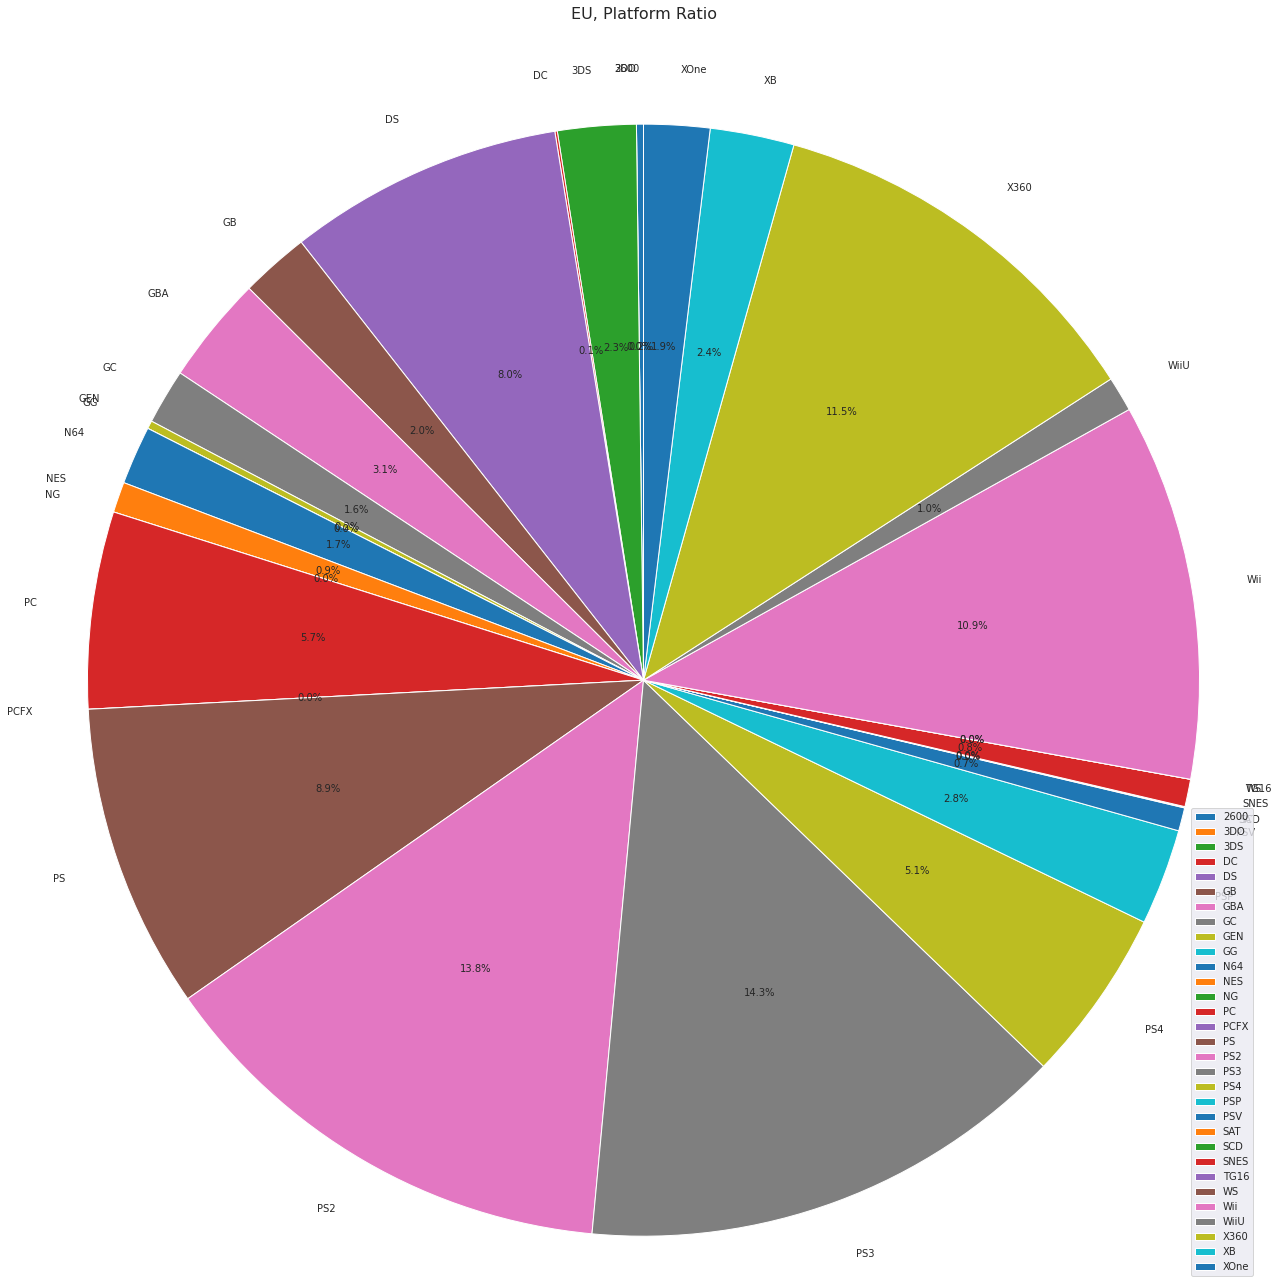

In [100]:
#지역별 플랫폼 비율을보자
#EU 유럽 지역의 플랫폼별 출고비율
platform_eu_sales = new_df.groupby('Platform')['EU_Sales'].sum()
platform_eu_sales_ratio = platform_eu_sales / platform_eu_sales.sum()
platform_eu_sales_ratio


import matplotlib.pyplot as plt
platform_eu_sales_ratio
labels = platform_eu_sales_ratio.index
sizes = platform_eu_sales_ratio.values

fig, ax = plt.subplots(figsize=(22, 22))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('EU, Platform Ratio', fontsize=16,y=1.05)
plt.legend(labels, loc="best")
plt.show()

In [101]:
#Total_Sales, 전체 지역에서 가장 많이 팔린 플랫폼 형태는 1위 PS2 , 2위 Xbox360, 3위 PS3 4위 Wii이다 . (PS사가 2개나 탑3순위에 있으니 Wii가지 포함시켜)3가지 플랫폼 종류를 보도록 하자 
df_platform_topsale = df_platform.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
df_platform_topsale

Platform
PS2     1212.32
X360     957.72
PS3      945.25
Wii      899.30
DS       799.78
PS       723.48
GBA      312.43
PSP      287.16
PS4      269.15
GB       254.23
PC       252.61
NES      250.00
XB       246.23
3DS      231.23
N64      215.67
SNES     198.84
GC       195.58
XOne     141.08
2600      85.98
WiiU      81.79
PSV       60.88
SAT       32.34
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Total_Sales, dtype: float64

In [102]:
new_df[new_df['Platform']=='PC']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.0,0.00,0.03,0.03,0.00
12,Mount & Blade,PC,2008,Role-Playing,Paradox Interactive,0.00,0.02,0.0,0.00,0.02,0.02,0.00
16,Rise of Nations,PC,2003,Strategy,Microsoft Game Studios,0.01,0.02,0.0,0.01,0.04,0.03,0.01
19,Tropico Reloaded,PC,2009,Strategy,Kalypso Media,0.00,0.02,0.0,0.00,0.02,0.02,0.00
27,World of Tanks,PC,2011,Shooter,Wargaming.net,0.00,0.23,0.0,0.06,0.29,0.23,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
16453,"Warhammer 40,000: Dawn of War",PC,2004,Strategy,THQ,0.01,0.03,0.0,0.01,0.05,0.04,0.01
16474,F.E.A.R. Perseus Mandate,PC,2007,Shooter,Vivendi Games,0.01,0.00,0.0,0.00,0.01,0.01,0.00
16479,Gothic 3,PC,2006,Role-Playing,JoWood Productions,0.00,0.05,0.0,0.01,0.06,0.05,0.01
16494,Richard Burns Rally,PC,2004,Racing,SCi,0.00,0.03,0.0,0.01,0.04,0.03,0.01


# 플랫폼에 따른 전지역 총출고량을 조사했더니 플레이스테이션계열과 엑스박스가 가장 많은 출고량을 차지했고 그중 PS2이 압도적이었다.

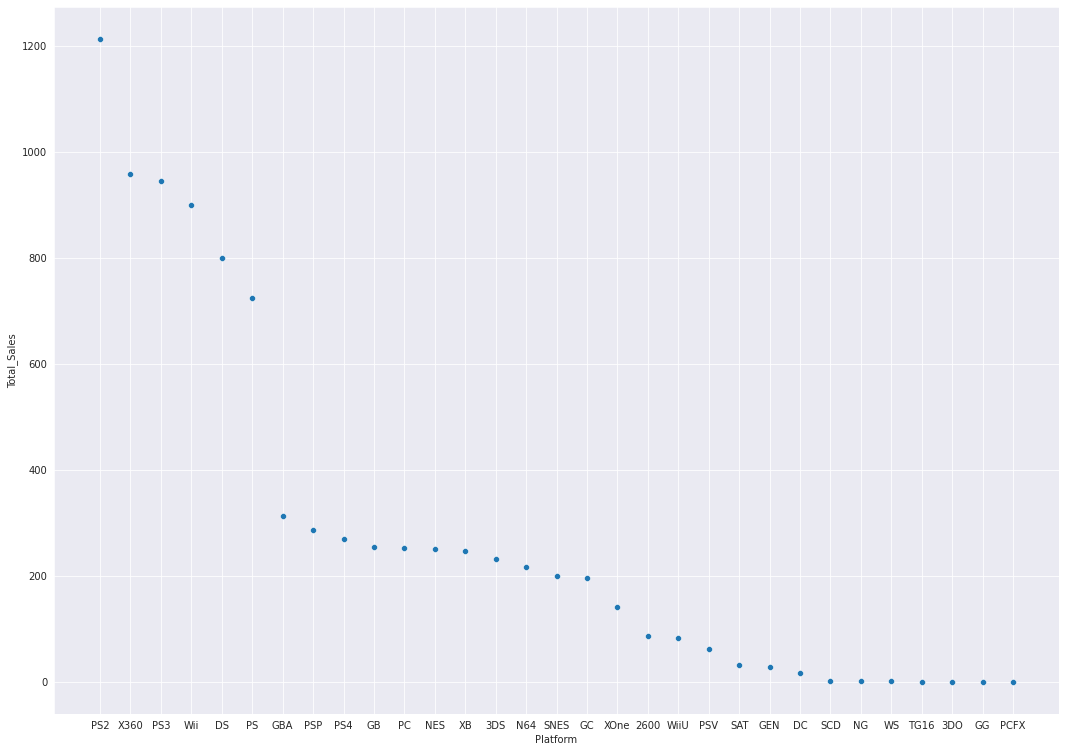

In [103]:
plt.figure(figsize=(18,13))
sns.scatterplot(data=df_platform_topsale)
plt.show()

# 이번에는 1980년부터 2017년까지의 년도를 10년 단위로(Decade) 구간을 나누어서 연대별 플랫폼 총출고량의 수를 시각화 해보았다.

In [104]:
df_platform

,Name,Platform,Year,Genre,Publisher,Western_Sales,Asian_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.02,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.21,0.04,0.25
...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.19,0.01,0.20
16544,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.01
16545,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.63,0.16,0.79
16546,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.10,0.28,0.38


In [105]:
#df_platform에서 10년 씩 잘라서 , 새로운 컬럼에 년대별 컬럼을 추가하였다.
df_platform.loc[(1980 <= df_platform['Year']) & (df_platform['Year'] < 1990), 'Decade'] = 1980
df_platform.loc[(1990 <= df_platform['Year']) & (df_platform['Year'] < 2000), 'Decade'] = 1990
df_platform.loc[(2000 <= df_platform['Year']) & (df_platform['Year'] < 2010), 'Decade'] = 2000
df_platform.loc[(2010 <= df_platform['Year']) & (df_platform['Year'] < 2020), 'Decade'] = 2010


/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [106]:
#decade column int로 교체 후 , decade 별로 시각화해보자 

In [107]:
df_platform.Decade = df_platform.Decade.astype('int')

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [108]:
df_platform.sort_values(by='Decade')

,Name,Platform,Year,Genre,Publisher,Western_Sales,Asian_Sales,Total_Sales,Decade
12818,RealSports Tennis,2600,1982,Sports,Atari,0.49,0.01,0.50,1980
7950,World Class Track Meet,NES,1986,Sports,Namco Bandai Games,2.37,0.71,3.08,1980
11577,Dragon Warrior,NES,1986,Role-Playing,Capcom,0.49,2.03,2.52,1980
1429,Moon Patrol,2600,1982,Shooter,Atari,1.11,0.01,1.12,1980
6615,Excitebike,NES,1984,Racing,Nintendo,2.52,1.64,4.16,1980
...,...,...,...,...,...,...,...,...,...
11185,The $1 Pyramid,Wii,2011,Misc,Ubisoft,0.08,0.01,0.09,2010
11184,Teenage Mutant Ninja Turtles: Danger of the Ooze,PS3,2014,Adventure,Activision,0.22,0.05,0.27,2010
11180,Moshi Monsters: Moshlings Theme Park,3DS,2012,Misc,Activision,0.26,0.03,0.29,2010
11201,Ragnarok: Hikari to Yami no Koujo,PSP,2011,Role-Playing,GungHo,0.02,0.05,0.07,2010


In [109]:
df_platform.groupby(['Decade','Platform']).sum()['Total_Sales']

Decade  Platform
1980    2600          85.98
        DS             0.02
        GB            66.40
        NES          222.46
        PC             0.07
1990    3DO            0.10
        DC             8.54
        GB           159.03
        GEN           28.35
        GG             0.04
        N64          178.46
        NES           27.54
        NG             1.44
        PC            49.96
        PCFX           0.03
        PS           582.93
        SAT           32.34
        SCD            1.86
        SNES         198.84
        TG16           0.16
        WS             0.46
2000    DC             7.41
        DS           686.14
        GB            28.80
        GBA          312.43
        GC           195.58
        N64           37.21
        PC            82.88
        PS           140.55
        PS2         1206.75
        PS3          345.15
        PSP          225.13
        WS             0.96
        Wii          676.22
        X360         411.91
   

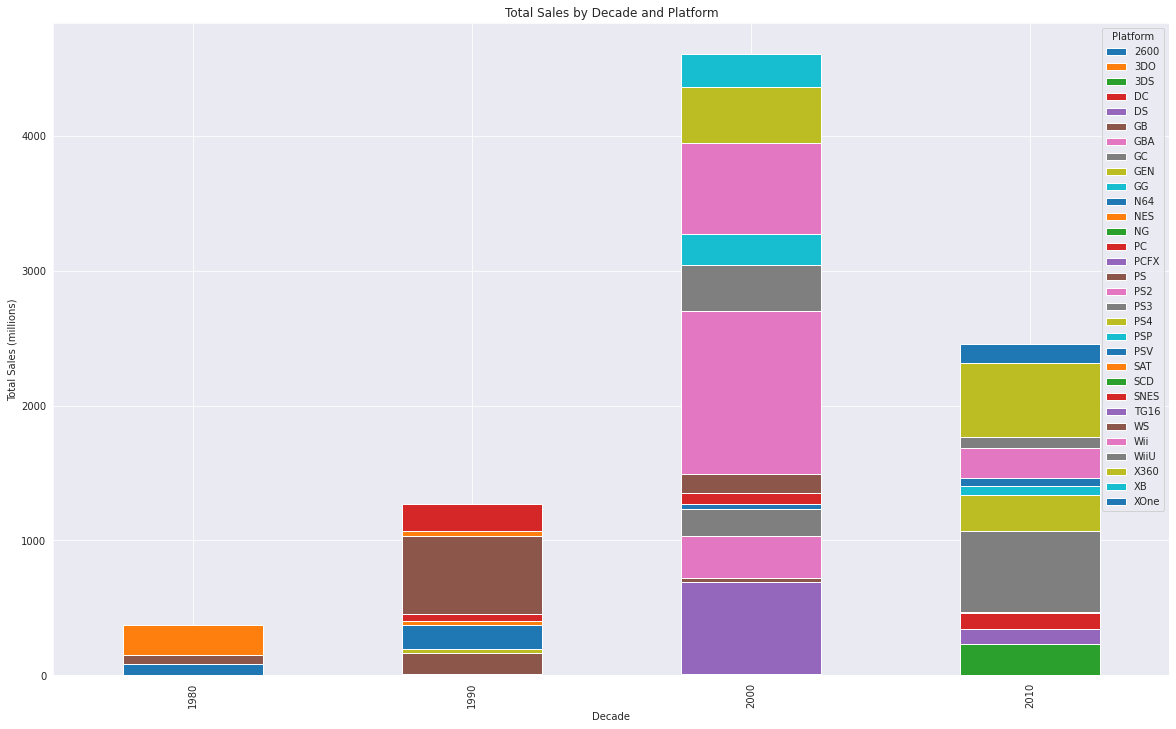

In [110]:
#stacked바 플랫폼에 따른, 년대별 판매량, 
import matplotlib.pyplot as plt

# Assuming df_platform is a pandas DataFrame containing the data
# grouped by decade and platform, with total sales summed up

# Group the data by decade and platform, and calculate total sales
grouped = df_platform.groupby(['Decade', 'Platform']).sum()['Total_Sales']

# Convert the groupby result to a pivot table for easier plotting
pivot_table = grouped.reset_index().pivot(index='Decade', columns='Platform', values='Total_Sales')

# Plot the pivot table as a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True)

# Set the plot title and axis labels
ax.set_title('Total Sales by Decade and Platform')
ax.set_xlabel('Decade')
ax.set_ylabel('Total Sales (millions)')

# Set the figure size
fig = ax.get_figure()
fig.set_size_inches(20, 12)

# Show the plot
plt.show()


## 좀더 보기 쉽게 개별 년대그래프로 그려보자

In [111]:
df_platform[df_platform['Decade']==1980].groupby('Platform').sum().sort_values(by='Total_Sales',ascending=False)

,Year,Western_Sales,Asian_Sales,Total_Sales,Decade
Platform,,,,,
NES,146956,132.71,89.75,222.46,146520
2600,227948,85.15,0.83,85.98,227700
GB,21878,48.46,17.94,66.40,21780
PC,3973,0.05,0.02,0.07,3960
DS,1985,0.00,0.02,0.02,1980


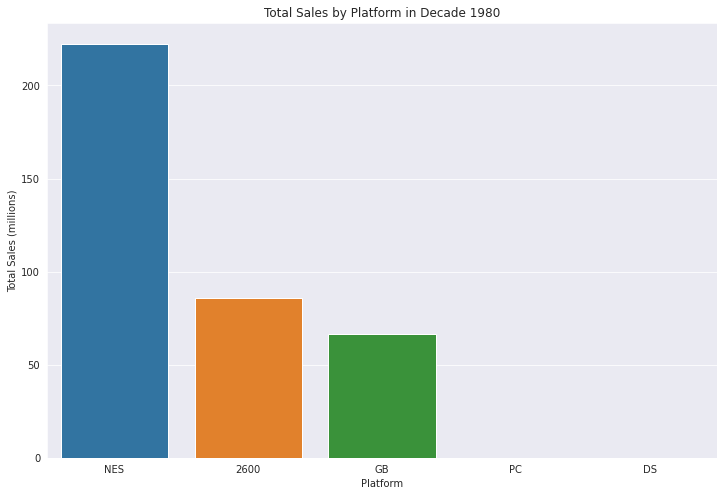

In [112]:
#1980년대의 플랫폼별판매 동황 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data by decade 1980
df_1980 = df_platform[df_platform['Decade'] == 1980]

# Group the data by 'Platform' and calculate the sum of 'Total_Sales'
df_1980_platform = df_1980.groupby('Platform')['Total_Sales'].sum().reset_index()

# Sort the data by 'Total_Sales' in descending order
df_1980_platform = df_1980_platform.sort_values(by='Total_Sales', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Platform', y='Total_Sales', data=df_1980_platform)
plt.title('Total Sales by Platform in Decade 1980')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()


In [113]:
df_platform[df_platform['Decade']==1990].groupby('Platform').sum().sort_values(by='Total_Sales',ascending=False)

,Year,Western_Sales,Asian_Sales,Total_Sales,Decade
Platform,,,,,
PS,1813511,431.88,151.05,582.93,1806920
SNES,470544,80.27,118.57,198.84,469640
N64,483534,150.01,28.45,178.46,481580
GB,117720,98.38,60.65,159.03,117410
PC,75857,48.35,1.61,49.96,75620
SAT,339325,1.26,31.08,32.34,338300
GEN,53812,24.79,3.56,28.35,53730
NES,45799,14.38,13.16,27.54,45770
DC,41972,3.80,4.74,8.54,41790


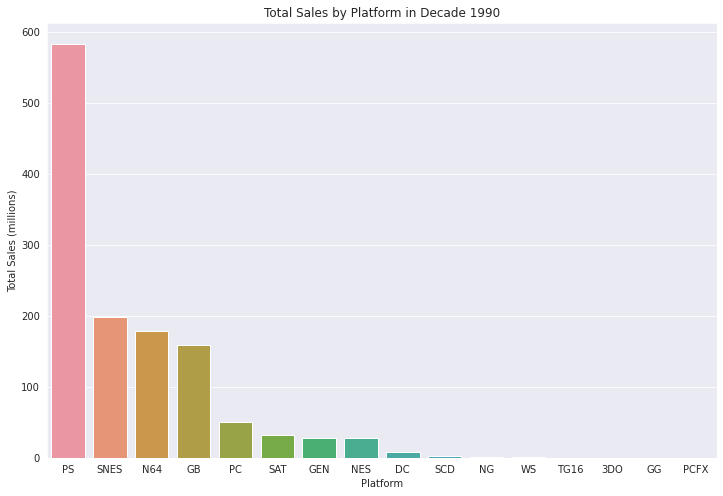

In [114]:
#1990년대의 플랫폼별판매 동황 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data by decade 1990
df_1990 = df_platform[df_platform['Decade'] == 1990]

# Group the data by 'Platform' and calculate the sum of 'Total_Sales'
df_1990_platform = df_1990.groupby('Platform')['Total_Sales'].sum().reset_index()

# Sort the data by 'Total_Sales' in descending order
df_1990_platform = df_1990_platform.sort_values(by='Total_Sales', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Platform', y='Total_Sales', data=df_1990_platform)
plt.title('Total Sales by Platform in Decade 1990')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

In [115]:
df_platform[df_platform['Decade']==2000].groupby('Platform').sum().sort_values(by='Total_Sales',ascending=False)

,Year,Western_Sales,Asian_Sales,Total_Sales,Decade
Platform,,,,,
PS2,4141215,888.23,318.52,1206.75,4132000
DS,3220021,487.84,198.30,686.14,3208000
Wii,1668700,565.44,110.78,676.22,1662000
X360,1102203,367.55,44.36,411.91,1098000
PS3,827311,275.84,69.31,345.15,824000
GBA,1612583,258.31,54.12,312.43,1610000
XB,1590889,236.58,9.65,246.23,1588000
PSP,1386833,154.97,70.16,225.13,1382000
GC,1077831,169.65,25.93,195.58,1076000


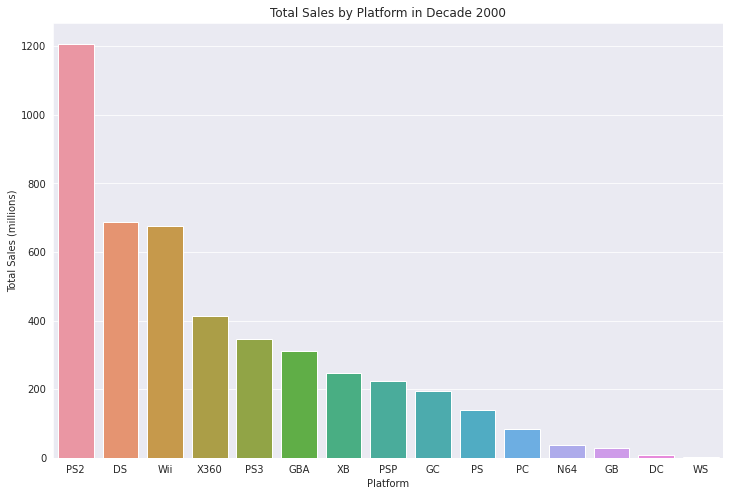

In [116]:
#2000년대의 플랫폼별판매 동황 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data by decade 2000
df_2000 = df_platform[df_platform['Decade'] == 2000]

# Group the data by 'Platform' and calculate the sum of 'Total_Sales'
df_2000_platform = df_2000.groupby('Platform')['Total_Sales'].sum().reset_index()

# Sort the data by 'Total_Sales' in descending order
df_2000_platform = df_2000_platform.sort_values(by='Total_Sales', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Platform', y='Total_Sales', data=df_2000_platform)
plt.title('Total Sales by Platform in Decade 2000')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

In [117]:
df_platform[df_platform['Decade']==2010].groupby('Platform').sum().sort_values(by='Total_Sales',ascending=False)

,Year,Western_Sales,Asian_Sales,Total_Sales,Decade
Platform,,,,,
PS3,1768653,450.93,149.17,600.10,1766790
X360,1363927,494.44,51.37,545.81,1362780
PS4,668981,213.33,55.82,269.15,667320
3DS,996463,126.95,104.28,231.23,994950
Wii,900765,189.71,33.37,223.08,900480
XOne,427135,128.82,12.26,141.08,426120
PC,923620,104.06,15.64,119.70,922590
DS,1019300,83.90,29.72,113.62,1019070
WiiU,287944,62.55,19.24,81.79,287430


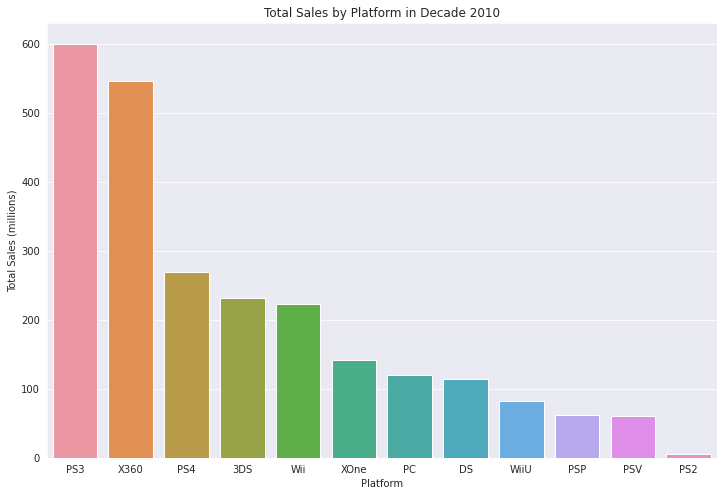

In [118]:
#2010년대의 플랫폼별판매 동황 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data by decade 2010
df_2010 = df_platform[df_platform['Decade'] == 2010]

# Group the data by 'Platform' and calculate the sum of 'Total_Sales'
df_2010_platform = df_2010.groupby('Platform')['Total_Sales'].sum().reset_index()

# Sort the data by 'Total_Sales' in descending order
df_2010_platform = df_2010_platform.sort_values(by='Total_Sales', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Platform', y='Total_Sales', data=df_2010_platform)
plt.title('Total Sales by Platform in Decade 2010')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()


In [119]:
df_platform.groupby(['Platform','Decade']).sum().sort_values(by='Total_Sales',ascending=False)

Year  Western_Sales  Asian_Sales  Total_Sales
Platform Decade                                                  
PS2      2000    4141215         888.23       318.52      1206.75
DS       2000    3220021         487.84       198.30       686.14
Wii      2000    1668700         565.44       110.78       676.22
PS3      2010    1768653         450.93       149.17       600.10
PS       1990    1813511         431.88       151.05       582.93
X360     2010    1363927         494.44        51.37       545.81
         2000    1102203         367.55        44.36       411.91
PS3      2000     827311         275.84        69.31       345.15
GBA      2000    1612583         258.31        54.12       312.43
PS4      2010     668981         213.33        55.82       269.15
XB       2000    1590889         236.58         9.65       246.23
3DS      2010     996463         126.95       104.28       231.23
PSP      2000    1386833         154.97        70.16       225.13
Wii      2010     900765         189.71        33.37       223.08
NES      1980     146956         132.71        89.75       222.46
SNES     1990     470544          80.27       118.57       198.84
GC       2000    1077831         169.65        25.93       195.58
N64      1990     483534         150.01        28.45       178.46
GB       1990     117720          98.38        60.65       159.03
XOne     2010     427135         128.82        12.26       141.08
PS       2000     540138         112.51        28.04       140.55
PC       2010     923620         104.06        15.64       119.70
DS       2010    1019300          83.90        29.72       113.62
2600     1980     227948          85.15         0.83        85.98
PC       2000     872753          75.86         7.02        82.88
WiiU     2010     287944          62.55        19.24        81.79
GB       1980      21878          48.46        17.94        66.40
PSP      2010     995512          16.30        45.73        62.03
PSV      2010     817697          31.96        28.92        60.88
PC       1990      75857          48.35         1.61        49.96
N64      2000     138011          27.92         9.29        37.21
SAT      1990     339325           1.26        31.08        32.34
GB       2000      52010          14.31        14.49        28.80
GEN      1990      53812          24.79         3.56        28.35
NES      1990      45799          14.38        13.16        27.54
DC       1990      41972           3.80         4.74         8.54
         2000      62025           3.32         4.09         7.41
PS2      2010      86437           3.56         2.01         5.57
SCD      1990      11963           1.36         0.50         1.86
NG       1990      23934           0.00         1.44         1.44
WS       2000       8002           0.00         0.96         0.96
         1990       3998           0.00         0.46         0.46
TG16     1990       3990           0.00         0.16         0.16
3DO      1990       5984           0.00         0.10         0.10
PC       1980       3973           0.05         0.02         0.07
GG       1990       1992           0.00         0.04         0.04
PCFX     1990       1996           0.00         0.03         0.03
DS       1980       1985           0.00         0.02         0.02

#어떤 플랫폼으로 ? -> 가장많이 팔리는 플랫폼 조사 2개
#->년도 별 흐름을 보았을때 플스류는 항상 최상위권을 유지했고, 2010년이후로부터 엑스박스가 따라잡는 모습을 보인다

#PC와 기타 콘솔의 대립구도. -> PC판매량과 콘솔들의 판매량 비교
#-> 콘솔이 압도적으로 높아서 PC보다는 그냥 콘솔쪽으로 판매하기로 정하였다 -> (XBOX360, PS) 
#어떤 지역에 팔것이냐 ? -> 동 서양 모두를 타겟해서 공통적으로 가장 인기있는 장르,롤플레잉보다는 그 서양동양 교집합점 -> 롤플레잉도 고려 해볼만 했지만, 동서양 전체를 타겟으로 내기위해서 액션이나 스포츠 장르중 하나를 골르겠다. ->  (액션,스포츠)
#장르는 정말 동서양 교집합인가 아니면 새로 증가하는 트렌드가있나-> 시대별 흐름 시간에 따라 보면
#대부분 의 장르가 모두 판매의 하락세를 보인다. 그리고 슈팅같은경우는 정말 최정점을 찍었던 시대와
#현재 판매량이 너무나도 격차가 크다보니 이 이상의 수치를 다시 보여주기란 힘들 것으로 판단 하였다. 그나마 다시 상승세를 탈만한것은
#역시 액션이나 스포츠가 아닐까 한다. -> 하지만 2000년에서 2010년으로 넘어옴에 따라, 1,2위를 지키고있던 액션,스포츠의 전체 장르 대비 비율이, 액션은 유의미하게 증가했고, 스포츠도 유의미하게 줄어 듬을 볼수 있다. 그래서 조금 더 액션으로 출시하는 게 좋다고 생각한다.
#예전의 트렌드가 다시 돌아올것인가?-> 현재의 데이터로서는 잘 몰르겠다. 분석을 위해서는 다른 새로운 게임 개발 소식에 대한 데이터가 추가로 요구된다. 
#저조했던 장르가 올라설 가능성은? -> 현재로서는 전체 게임 자체의 판매량이 줄어들고 있기 때문에 가능성이 적어보인다. 
# 엑스박스가 플스에 대적할 만한 강자로 떠오르고 있지만 우리는 그래도 좀더 시대적 기간을 볼때
# PS,PS2,PS3유저를 합친 수를 고려할때 잠재적 플스 유저가 훨씬 많다고 생각하고, 신형PS가 나왔을때 
# PS를 구입할 확률이 높다고 보았다. 그리고 지금 상승세를 보이는 엑스박스에 대비해서 한번 더 경쟁적으로
# 새롭게 준비 할것이라 판단 하였다.
# 그래서 전체 시대적 장르비율과, 전체지역적 장르비율, 전체시대적 플랫폼비율 고려하여 
# 새로운 출시할 게임의 플랫폼은 PS로, 장르는 액션으로 출시하도록 한다.

* 
* 
* 

* 액션장르의 가장많이팔린 타이틀을 찾아보자 

* 
* 
*  

#top4 장르인 액션,스포츠,슈팅,롤플레잉의 가장 많이 출고된 타이틀을 찾아보자
#-> 토탈세일 기준으로 1위부터 5위까지 모두 GTA 시리즈가 가장 많은 출고량을 기록했다.
#-> 1위인 GTA5(PS3) 와 2위인 GTA 산안드레스(PS2) 의 차이점을 보면 2위인 2004년 발매한 산안드레스 는 일본을 제외한 아시아 지역에서 유독 출고가 많이 되었고, 동시에 유럽 출고량은 거의 일본과 비슷할 정도로 매우 저조하였다.
#-> 하지만 2013년 발매한 GTA5 는 유럽지역에서 아주 높은 수치를 보여주며 , 4개의 지역 구분 중 유럽에서 가장 많이 출고 되었고, 일본을 제외한 아시아 쪽에서는 오히려 출고량이 많이 감소하였다. 그러므로 전체 출고량 
# 21.39중 9.27 인 43%를 유럽이 점유했다. 반면 일본에서는 매번 출고량이 1(100만)에도 미치지 못할 정도로 항상 인기가 저조했다.
#-> GTA5(PS3) 2013,ACTION, (TAKE-TWO INTERACTIVE) 토탈 세일이 가장 높았다(21.39밀리언) -> 아시아 세일 에서는 5.11 로 조금 출고량이 낮앗다
#-> 3위도 GTA5(XBOX360) 버전이 가져갔다.
#-> PS3와 X360 버전을 합치면 전체 출고량이 21.39+16.15 = 37.54(밀리언)으로 액션 부분 장르에서 
#가장 성공적인 출고량을 기록했다.

In [120]:
#top4 장르인 액션,스포츠,슈팅,롤플레잉의 가장 많이 출고된 타이틀을 찾아보자
#-> 토탈세일 기준으로 1위부터 5위까지 모두 GTA 시리즈가 가장 많은 출고량을 기록했다.
#-> 1위인 GTA5(PS3) 와 2위인 GTA 산안드레스(PS2) 의 차이점을 보면 2위인 2004년 발매한 산안드레스 는 일본을 제외한 아시아 지역에서 유독 출고가 많이 되었고, 동시에 유럽 출고량은 거의 일본과 비슷할 정도로 매우 저조하였다.
#-> 하지만 2013년 발매한 GTA5 는 유럽지역에서 아주 높은 수치를 보여주며 , 4개의 지역 구분 중 유럽에서 가장 많이 출고 되었고, 일본을 제외한 아시아 쪽에서는 오히려 출고량이 많이 감소하였다. 그러므로 전체 출고량 
# 21.39중 9.27 인 43%를 유럽이 점유했다. 반면 일본에서는 매번 출고량이 1(100만)에도 미치지 못할 정도로 항상 인기가 저조했다.
#-> GTA5(PS3) 2013,ACTION, (TAKE-TWO INTERACTIVE) 토탈 세일이 가장 높았다(21.39밀리언) -> 아시아 세일 에서는 5.11 로 조금 출고량이 낮앗다
#-> 3위도 GTA5(XBOX360) 버전이 가져갔다.
#-> PS3와 X360 버전을 합치면 전체 출고량이 21.39+16.15 = 37.54(밀리언)으로 액션 부분 장르에서 
#가장 성공적인 출고량을 기록했다.

In [121]:
new_df[new_df['Genre']=='Action'].sort_values(by='Total_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
3473,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,16.28,5.11
14628,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,9.83,10.98
10884,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,14.94,1.44
5323,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,13.90,2.25
9760,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,11.50,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...
10323,Coven and Labyrinth of Refrain,PSV,2016,Action,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01,0.00,0.01
3798,"Crouching Tiger, Hidden Dragon",XB,2003,Action,Ubisoft,0.01,0.00,0.00,0.00,0.01,0.01,0.00
10436,Tsuyo Kiss 3 Portable,PSP,2012,Action,NetRevo,0.00,0.00,0.01,0.00,0.01,0.00,0.01
5210,Marvel Superheroes 3D: Grandmaster's Challenge,Wii,2010,Action,Neko Entertainment,0.00,0.01,0.00,0.00,0.01,0.01,0.00


In [122]:
new_df[(new_df['Platform']=='X360')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
23,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01,0.01,0.00
32,Project Sylpheed: Arc of Deception,X360,2006,Shooter,Microsoft Game Studios,0.12,0.01,0.02,0.01,0.16,0.13,0.03
44,Crysis 3,X360,2013,Shooter,Electronic Arts,0.51,0.33,0.01,0.08,0.93,0.84,0.09
49,Dreamworks Madagascar Kartz,X360,2009,Racing,Activision,0.14,0.09,0.00,0.02,0.25,0.23,0.02
60,Unreal Tournament III,X360,2008,Shooter,Midway Games,0.25,0.17,0.01,0.05,0.48,0.42,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
16454,Metal Gear Solid V: Ground Zeroes,X360,2014,Action,Konami Digital Entertainment,0.07,0.06,0.01,0.01,0.15,0.13,0.02
16461,FIFA World Cup Germany 2006,X360,2006,Sports,Electronic Arts,0.19,0.27,0.01,0.00,0.47,0.46,0.01
16476,Rapala Fishing Frenzy 2009,X360,2008,Sports,Activision,0.04,0.00,0.00,0.00,0.04,0.04,0.00
16484,Karaoke Revolution Glee: Volume 3,X360,2011,Misc,Konami Digital Entertainment,0.13,0.00,0.00,0.01,0.14,0.13,0.01


In [123]:
new_df[new_df['Platform']=='PS4']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05,0.02,0.03
55,Sébastien Loeb Rally Evo,PS4,2016,Racing,Milestone S.r.l,0.00,0.04,0.00,0.01,0.05,0.04,0.01
67,Sherlock Holmes: Crimes & Punishments,PS4,2014,Adventure,Focus Home Interactive,0.08,0.14,0.00,0.05,0.27,0.22,0.05
116,Jikkyou Powerful Pro Baseball 2016,PS4,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.17,0.00,0.17,0.00,0.17
131,Rabbids Invasion: The Interactive TV Show,PS4,2014,Misc,Ubisoft,0.00,0.01,0.00,0.00,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,NHL 17,PS4,2016,Sports,Electronic Arts,0.13,0.04,0.00,0.04,0.21,0.17,0.04
16391,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14,1.75,0.39
16500,Dead or Alive 5,PS4,2015,Fighting,Tecmo Koei,0.09,0.13,0.08,0.04,0.34,0.22,0.12
16522,Koihime Enbu,PS4,2016,Fighting,Yeti,0.00,0.00,0.02,0.00,0.02,0.00,0.02


In [124]:
new_df[(new_df['Platform']=='PS')|(new_df['Platform']=='PS2')|(new_df['Platform']=='PS3')|(new_df['Platform']=='PS4')].sort_values(by='Platform').reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Western_Sales,Asian_Sales
0,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01,0.17,0.00,0.17
1,Hoshigami: Ruining Blue Earth,PS,2001,Role-Playing,Max Five,0.03,0.02,0.00,0.00,0.05,0.05,0.00
2,Return Fire,PS,1996,Strategy,Time Warner Interactive,0.05,0.03,0.00,0.01,0.09,0.08,0.01
3,Chess,PS,2001,Strategy,Success,0.05,0.04,0.00,0.01,0.10,0.09,0.01
4,Street Racer,PS,1996,Racing,Ubisoft,0.09,0.06,0.00,0.01,0.16,0.15,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
4905,Assassin's Creed: Unity,PS4,2014,Action,Ubisoft,1.18,1.96,0.08,0.70,3.92,3.14,0.78
4906,Disney Infinity 3.0,PS4,2015,Action,Disney Interactive Studios,0.21,0.36,0.00,0.11,0.68,0.57,0.11
4907,Guilty Gear Xrd: Sign,PS4,2014,Fighting,Arc System Works,0.10,0.00,0.04,0.02,0.16,0.10,0.06
4908,Destiny: The Collection,PS4,2016,Shooter,Activision,0.01,0.04,0.00,0.01,0.06,0.05,0.01


## PS 계열을 통해 발매된 타이틀의 수를 시각화 한다 (총 4910)

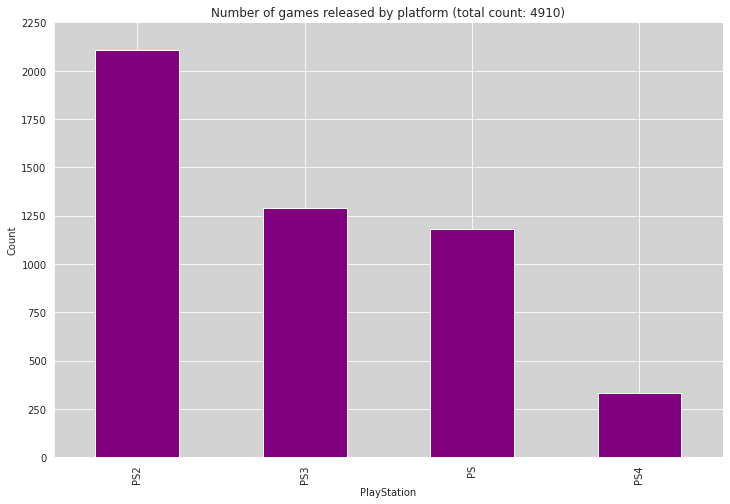

In [125]:
import matplotlib.pyplot as plt

# 새로운 데이터로 만들어보자
ps_df = new_df[(new_df['Platform']=='PS')|(new_df['Platform']=='PS2')|(new_df['Platform']=='PS3')|(new_df['Platform']=='PS4')]

# 각 고유의 플랫폼 행수를 계산해보자  
platform_counts = ps_df['Platform'].value_counts()

# PS,PS2,PS3,PS4 합계 총수를 계산해보자.
total_count = platform_counts.sum()

# 바 플롯을 만들자 플랫폼으로 카운트된 

fig, ax = plt.subplots(figsize=(12, 8))  # <-- 사이즈지정 
platform_counts.plot(kind='bar', x='Platform', y='Count', color='purple', ax=ax) #<-컬러셋팅

# 제목과 레이블 
ax.set_title(f'Number of games released by platform (total count: {total_count})')
ax.set_xlabel('PlayStation')
ax.set_ylabel('Count')
#배경색설정
ax.set_facecolor('lightgrey')
# y축 맥시멈값과,y 틱을 위의 자료와 통일해보자 
ax.set_ylim([0, 2250])
ax.set_yticks(range(0, 2251, 250))
# 최종 보여주기
plt.show()


## Xbox360을 통해 발매된 타이틀의 수를 시각화 한다 (총1227)

In [126]:
#XBOX 유저수 new_df[(new_df['Platform']=='X360')].shape[0] = 1227
new_df[(new_df['Platform']=='X360')].shape[0]

1227

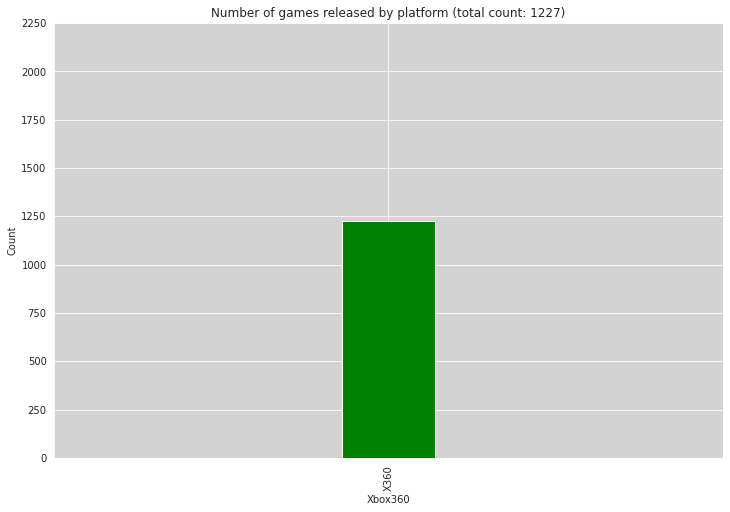

In [127]:
import matplotlib.pyplot as plt

# 새로운 데이터로 만들어보자
x360_df = new_df[(new_df['Platform']=='X360')]

# 각 고유의 플랫폼 행수를 계산해보자  
x360_platform_counts = x360_df['Platform'].value_counts()

# PS,PS2,PS3,PS4 합계 총수를 계산해보자.
x360_total_count = x360_platform_counts.sum()

# 바 플롯을 만들자 플랫폼으로 카운트된 
# 좀더 비교해보기 쉽기위해 막대바의 폭을 조정해보자 width=0.5
fig, ax = plt.subplots(figsize=(12, 8))  # <-- 사이즈지정 
x360_platform_counts.plot(kind='bar', x='Platform', y='Count', color='green', width=0.08, ax=ax) #<- 컬러,바 폭 설정


# 제목과 레이블 
ax.set_title(f'Number of games released by platform (total count: {x360_total_count})')
ax.set_xlabel('Xbox360')
ax.set_ylabel('Count')
#배경색설정
ax.set_facecolor('lightgrey')

# y축 맥시멈값과,y 틱을 위의 자료와 통일해보자 
ax.set_ylim([0, 2250])
ax.set_yticks(range(0, 2251, 250))
# 최종 보여주기
plt.show()

In [128]:
#PS,PS2,PS3,PS4유저수 (물론 PS플랫폼을 중복으로 갖고 있을 수도 있지만 최대한 광역적인 면을 고려하기위해서 전체를 그냥 더하기로 하였다.
#new_df[(new_df['Platform']=='PS')|(new_df['Platform']=='PS2')|(new_df['Platform']=='PS3')|(new_df['Platform']=='PS4')].sort_values(by='Platform').reset_index(drop=True).shape[0]=4910
new_df[(new_df['Platform']=='PS')|(new_df['Platform']=='PS2')|(new_df['Platform']=='PS3')|(new_df['Platform']=='PS4')].sort_values(by='Platform').reset_index(drop=True).shape[0]
#플스 플랫폼으로 판매된량이 엑스박스 360보다 대략 4배정도 많다는걸 알 수 있다.
#이걸 보고 우리는 확실히 플랫폼은 PS로 출시하기로 한다.

4910

#현재까지의 플레이스테이션 출시일
* PlayStation (PS1): December 3, 1994
* PlayStation 2 (PS2): March 4, 2000
* PlayStation 3 (PS3): November 11, 2006
* PlayStation 4 (PS4): November 15, 2013
* PlayStation 5 (PS5): November 12, 2020 (in select countries) and November 19, 2020 (worldwide)



#**다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론** :
####PlayStation은 대략 적으로 6-7년 주기로 출시하는 것으로 보아 
####PS6 출시 예상 연도를 2026-2027년으로 생각하고
#### 회사가 새롭게 출시할 게임의 플랫폼은 PS6으로, 장르는 Action으로, 전지역을 대상으로 출시하도록 한다.